In [3]:
# Importing the necessary libraries.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore") 

In [4]:
csv_file_path = 'diabetes.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to check if the data is loaded correctly
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [5]:
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [6]:
# Last ten rows in the dataset.

df.tail(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
758            1      106             76              0        0  37.5   
759            6      190             92              0        0  35.5   
760            2       88             58             26       16  28.4   
761            9      170             74             31        0  44.0   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
758                     0.197   26        0  
759                     0.278   66        1  
760                     0.766   22        0  
761                     0.403   43        1  
762                     0.142   33        0  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [7]:
# Basic dataset information. Float, Object and integer values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Checking for null values. No null/missing values.

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Check for duplicates across all columns
duplicates = df.duplicated()

# Display the rows containing duplicates
print("Rows containing duplicates:")
print(df[duplicates])

Rows containing duplicates:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [10]:
#number of distinct observations per group for each column
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [11]:
# Summary statistics of dataset with T referring to transpose.

df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

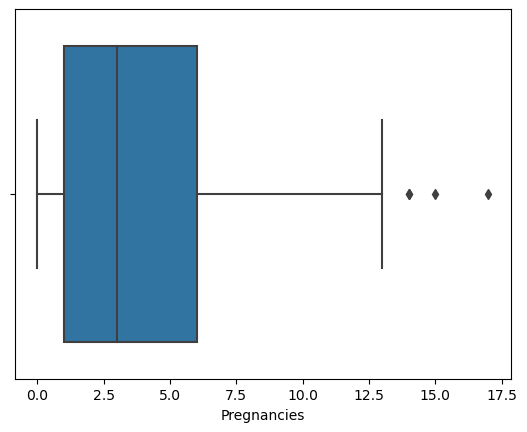

In [12]:
# Create a box plot for engine size to check for outliers.

sns.boxplot(x=df['Pregnancies'])
plt.show()

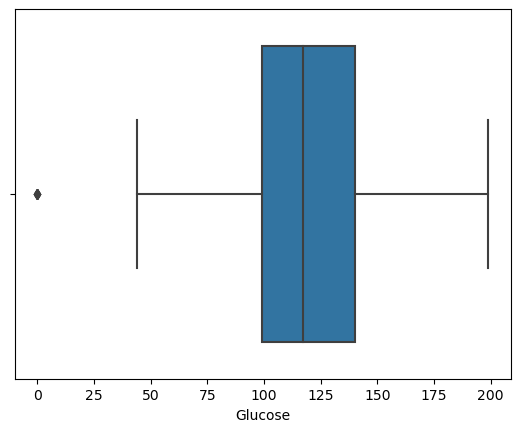

In [13]:
# Create a box plot for engine size to check for outliers.

sns.boxplot(x=df['Glucose'])
plt.show()

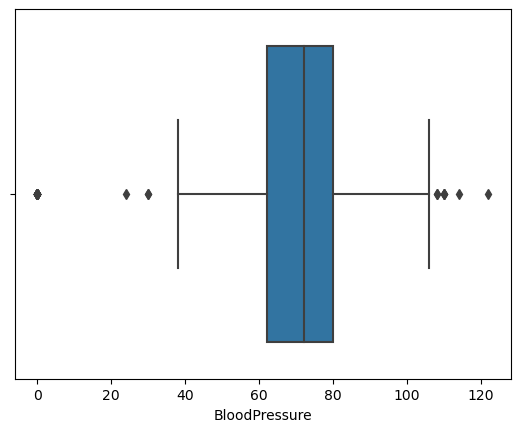

In [14]:
# Create a box plot for engine size to check for outliers.

sns.boxplot(x=df['BloodPressure'])
plt.show()

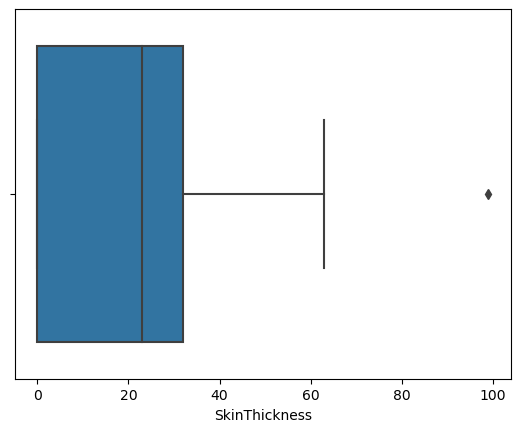

In [15]:
# Create a box plot for engine size to check for outliers.

sns.boxplot(x=df['SkinThickness'])
plt.show()

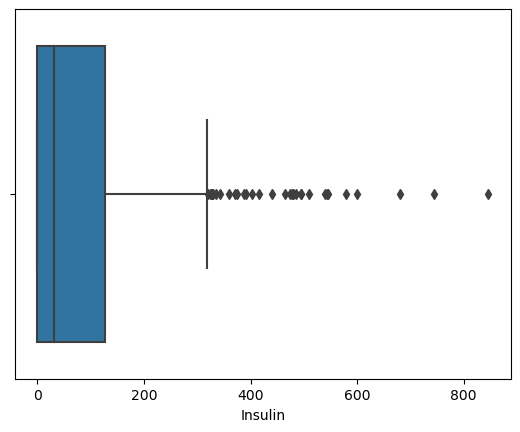

In [16]:
# Create a box plot for engine size to check for outliers.

sns.boxplot(x=df['Insulin'])
plt.show()

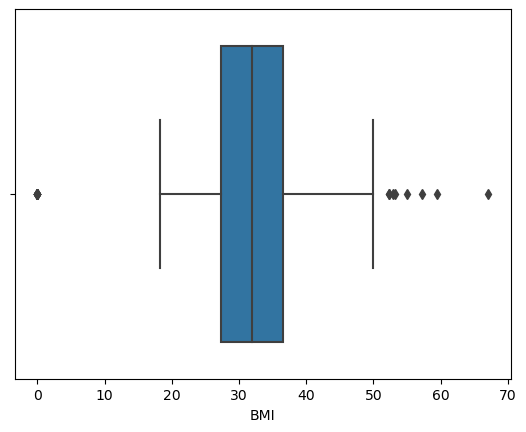

In [17]:
# Create a box plot for engine size to check for outliers.

sns.boxplot(x=df['BMI'])
plt.show()

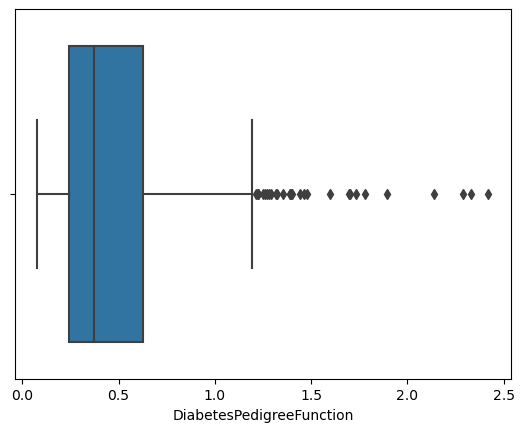

In [18]:
# Create a box plot for engine size to check for outliers.

sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()

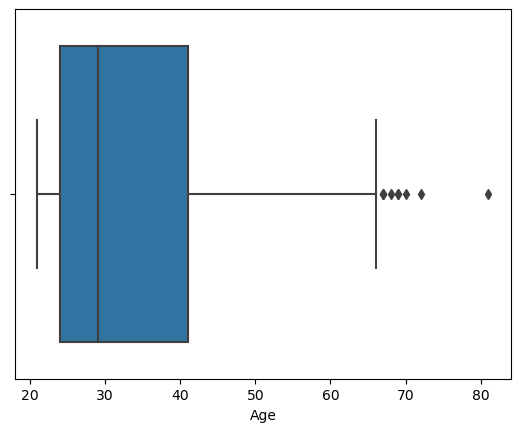

In [19]:
# Create a box plot for engine size to check for outliers.

sns.boxplot(x=df['Age'])
plt.show()

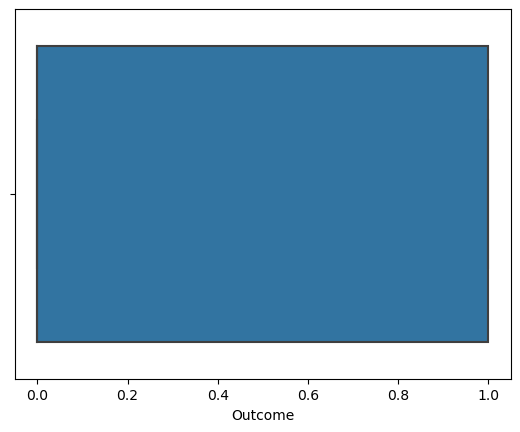

In [20]:
# Create a box plot for engine size to check for outliers.

sns.boxplot(x=df['Outcome'])
plt.show()

In [21]:
# Removing outliers from Pregnancies

Q1 = df['Pregnancies'].quantile(0.25)
Q3 = df['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

In [22]:
df_no_outliers = df[(df['Pregnancies'] >= lower_bound) & (df['Pregnancies'] <= upper_bound)]

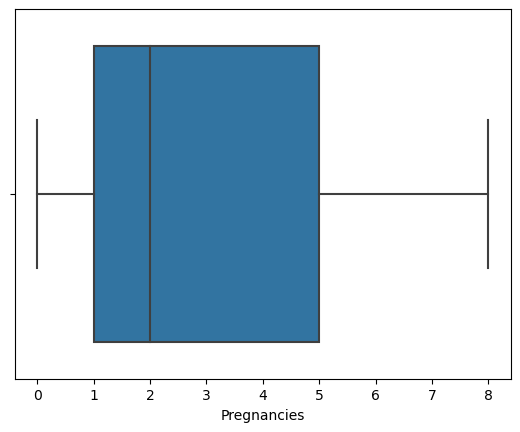

In [23]:
sns.boxplot(x=df_no_outliers['Pregnancies'])
plt.show()

In [24]:
# Removing outliers from Glucose

Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

In [25]:
df_no_outliers = df[(df['Glucose'] >= lower_bound) & (df['Glucose'] <= upper_bound)]

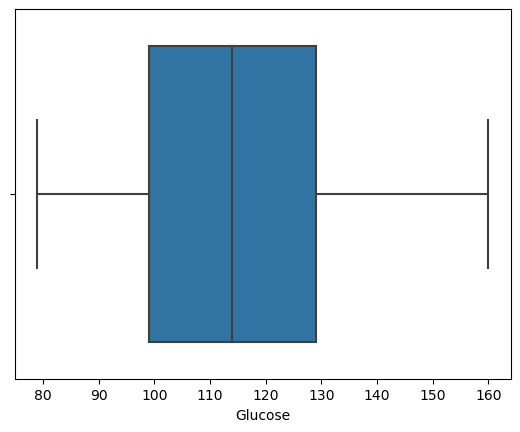

In [26]:
sns.boxplot(x=df_no_outliers['Glucose'])
plt.show()

In [27]:
# Removing outliers from BloodPressure

Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

In [28]:
df_no_outliers = df[(df['BloodPressure'] >= lower_bound) & (df['BloodPressure'] <= upper_bound)]

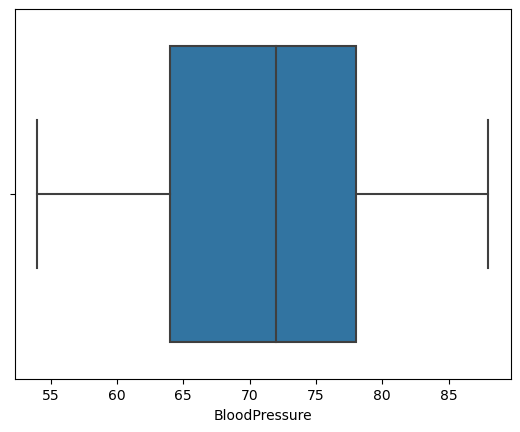

In [29]:
sns.boxplot(x=df_no_outliers['BloodPressure'])
plt.show()

In [30]:
# Removing outliers from SkinThickness

Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

In [31]:
df_no_outliers = df[(df['SkinThickness'] >= lower_bound) & (df['SkinThickness'] <= upper_bound)]

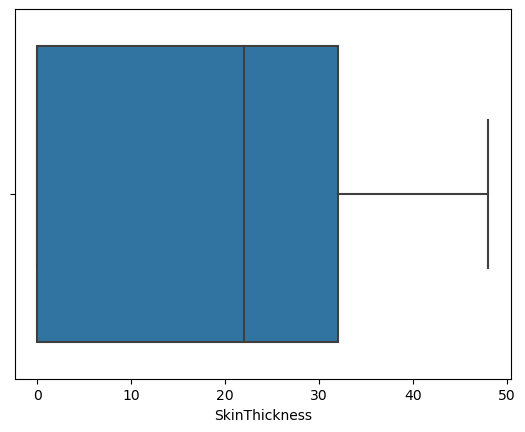

In [32]:
sns.boxplot(x=df_no_outliers['SkinThickness'])
plt.show()

In [33]:
# Removing outliers from Insulin

Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

In [34]:
df_no_outliers = df[(df['Insulin'] >= lower_bound) & (df['Insulin'] <= upper_bound)]

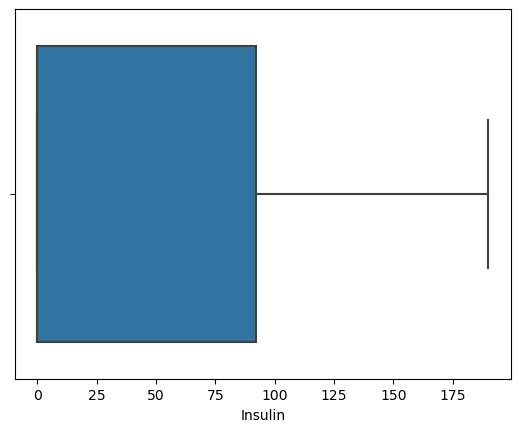

In [35]:
sns.boxplot(x=df_no_outliers['Insulin'])
plt.show()

In [36]:
# Removing outliers from BMI

Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

In [37]:
df_no_outliers = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]

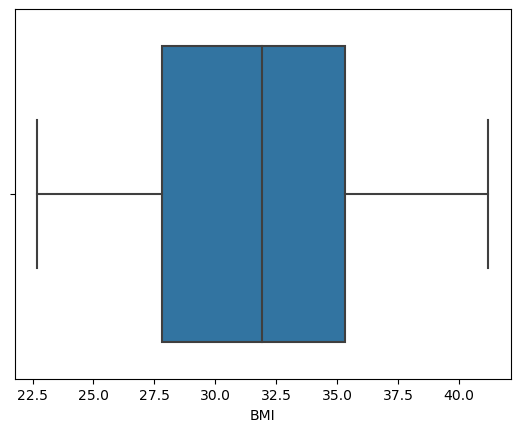

In [38]:
sns.boxplot(x=df_no_outliers['BMI'])
plt.show()

In [39]:
# Removing outliers from DiabetesPedigreeFunction

Q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

In [40]:
df_no_outliers = df[(df['DiabetesPedigreeFunction'] >= lower_bound) & (df['DiabetesPedigreeFunction'] <= upper_bound)]

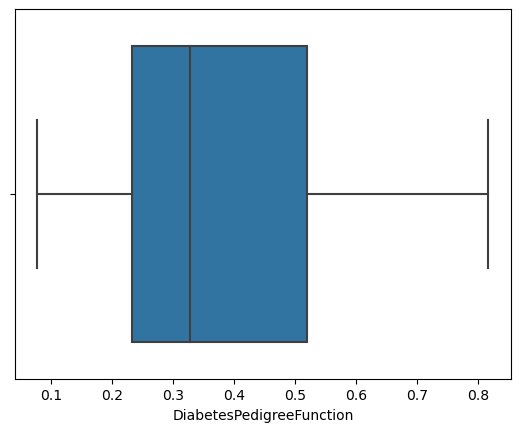

In [41]:
sns.boxplot(x=df_no_outliers['DiabetesPedigreeFunction'])
plt.show()

In [42]:
# Removing outliers from Age

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

In [43]:
df_no_outliers = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

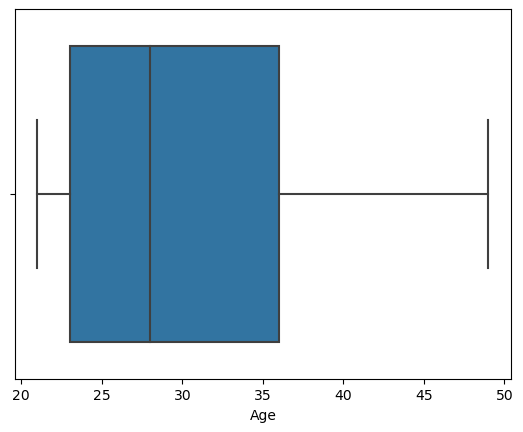

In [44]:
sns.boxplot(x=df_no_outliers['Age'])
plt.show()

In [45]:
# Removing outliers from Outcome

Q1 = df['Outcome'].quantile(0.25)
Q3 = df['Outcome'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

In [46]:
df_no_outliers = df[(df['Outcome'] >= lower_bound) & (df['Outcome'] <= upper_bound)]

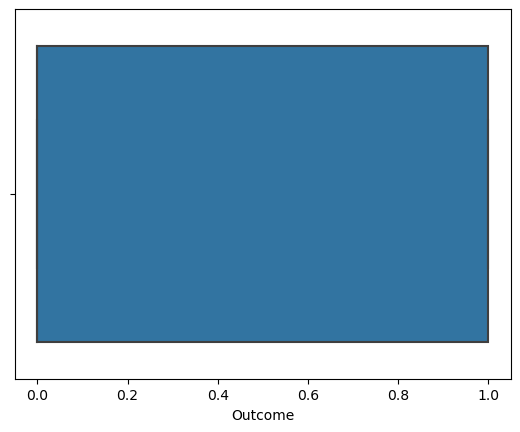

In [47]:
sns.boxplot(x=df_no_outliers['Outcome'])
plt.show()

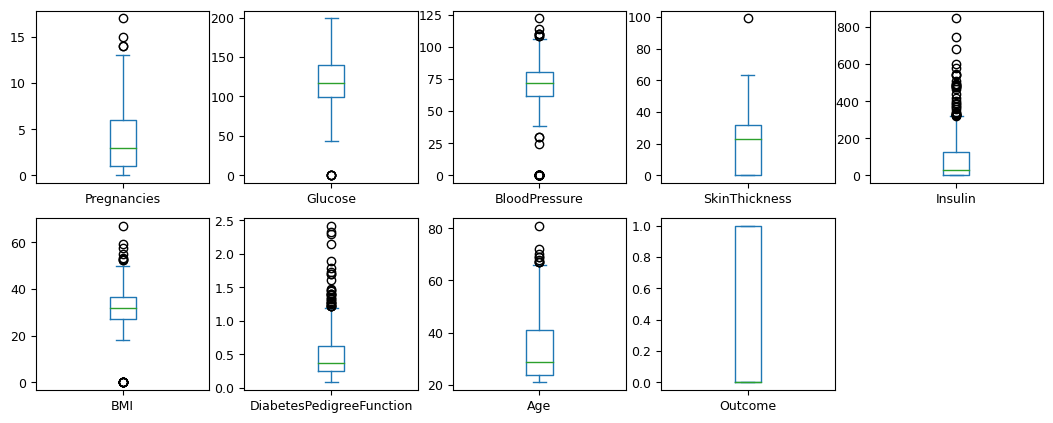

In [48]:
df.plot(kind='box', subplots=True, layout= (5,5), fontsize=9, figsize=(13,13));

In [49]:
# Calculate the IQR for each column in the DataFrame
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a condition to identify outliers
outlier_condition = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Remove rows containing outliers
df_no_outliers = df[~outlier_condition.any(axis=1)]

# Display the first few rows of the DataFrame without outliers
df_no_outliers.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0

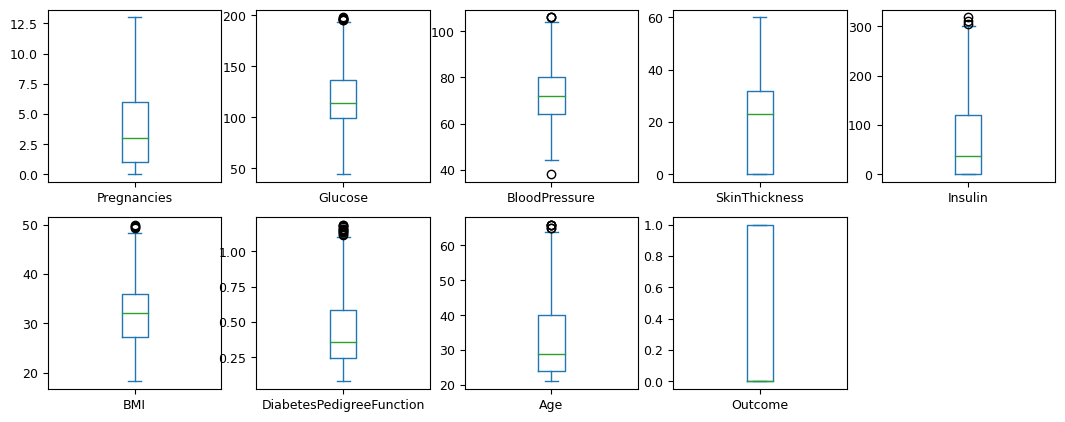

In [50]:
df_no_outliers.plot(kind='box', subplots=True, layout= (5,5), fontsize=9, figsize=(13,13));

<Axes: xlabel='Pregnancies', ylabel='Count'>

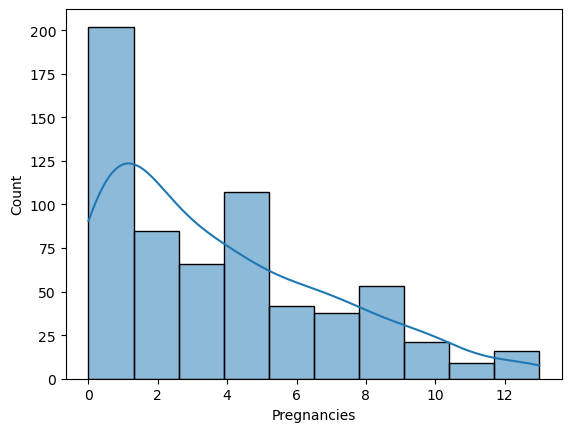

In [51]:
sns.histplot(df_no_outliers['Pregnancies'], kde=True, bins=10)

<Axes: xlabel='Glucose', ylabel='Count'>

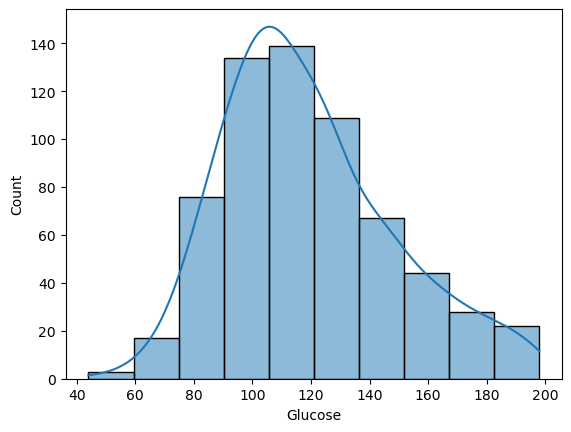

In [52]:
sns.histplot(df_no_outliers['Glucose'], kde=True, bins=10)

<Axes: xlabel='BloodPressure', ylabel='Count'>

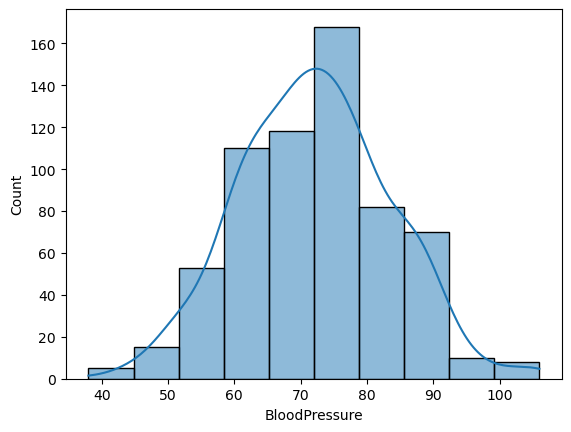

In [53]:
sns.histplot(df_no_outliers['BloodPressure'], kde=True, bins=10)

<Axes: xlabel='SkinThickness', ylabel='Count'>

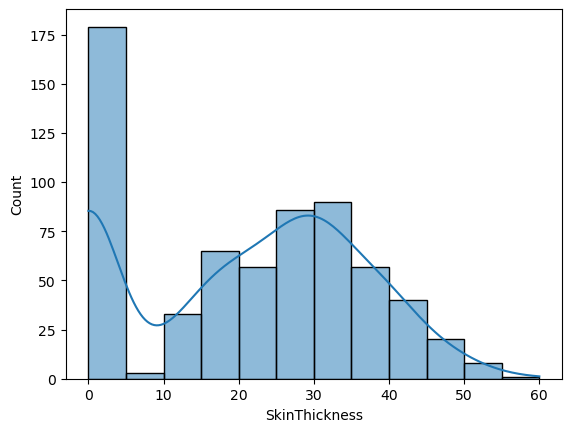

In [54]:
sns.histplot(df_no_outliers['SkinThickness'], kde=True, bins=12)

<Axes: xlabel='Insulin', ylabel='Count'>

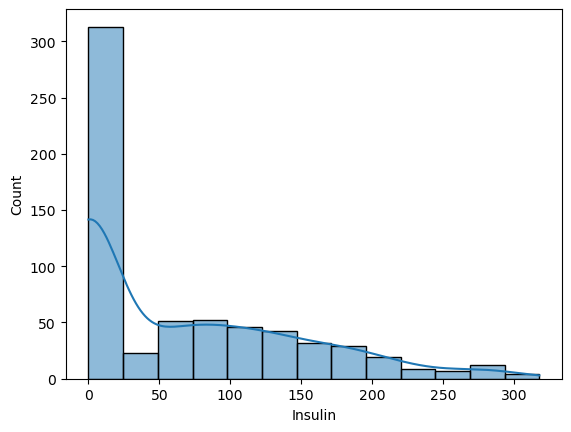

In [55]:
sns.histplot(df_no_outliers['Insulin'], kde=True, bins=13)

<Axes: xlabel='BMI', ylabel='Count'>

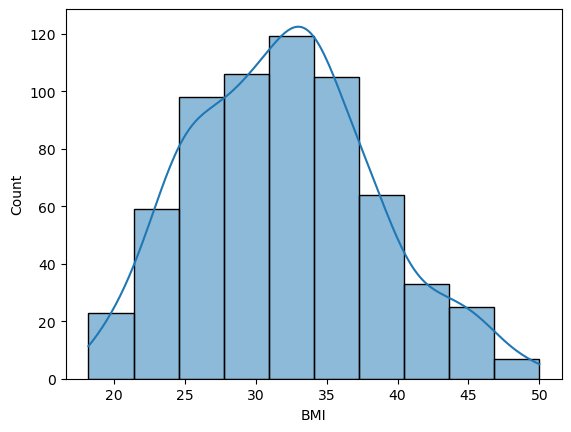

In [56]:
sns.histplot(df_no_outliers['BMI'], kde=True, bins=10)

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

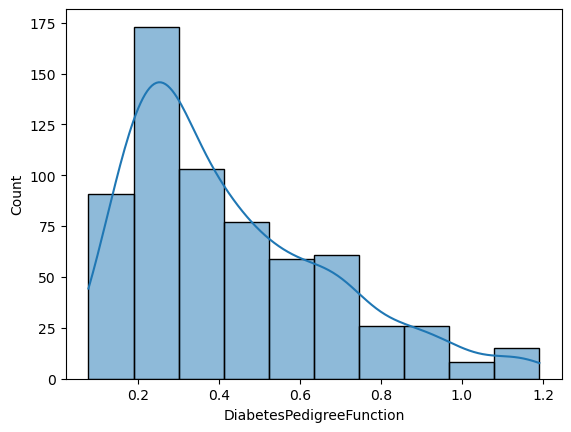

In [57]:
sns.histplot(df_no_outliers['DiabetesPedigreeFunction'], kde=True, bins=10)

<Axes: xlabel='Age', ylabel='Count'>

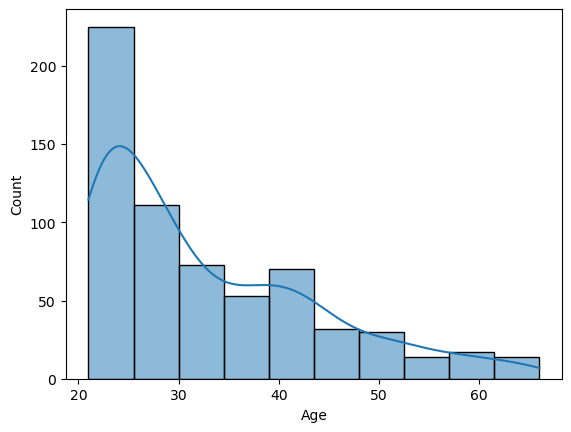

In [58]:
sns.histplot(df_no_outliers['Age'], kde=True, bins=10)

<Axes: xlabel='Outcome', ylabel='Count'>

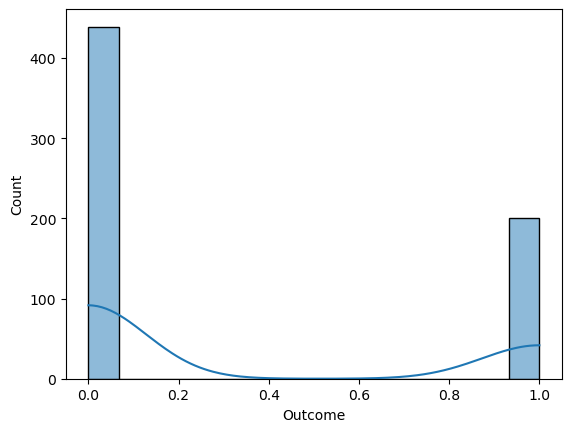

In [59]:
sns.histplot(df_no_outliers['Outcome'], kde=True, bins=15)

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

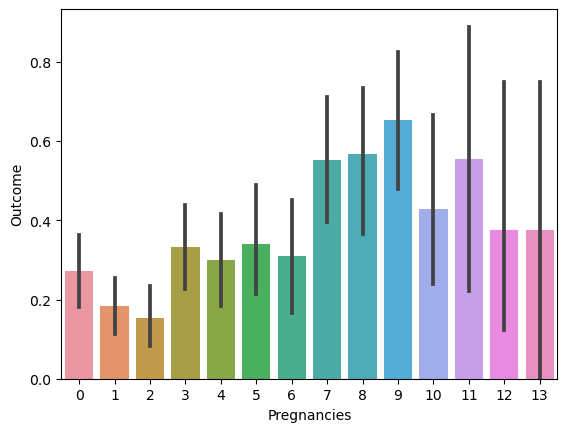

In [60]:
sns.barplot(x='Pregnancies', y='Outcome', data=df_no_outliers)

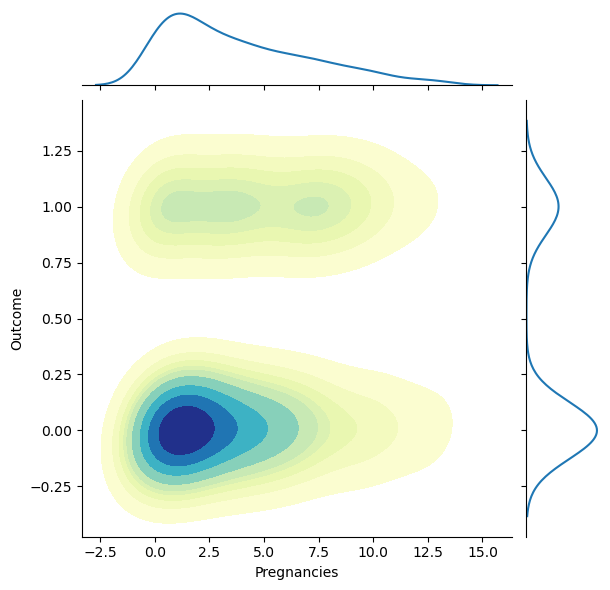

In [61]:
sns.jointplot(data=df_no_outliers, y='''Outcome''', x="Pregnancies",  kind="kde", shade=True,cmap="YlGnBu")

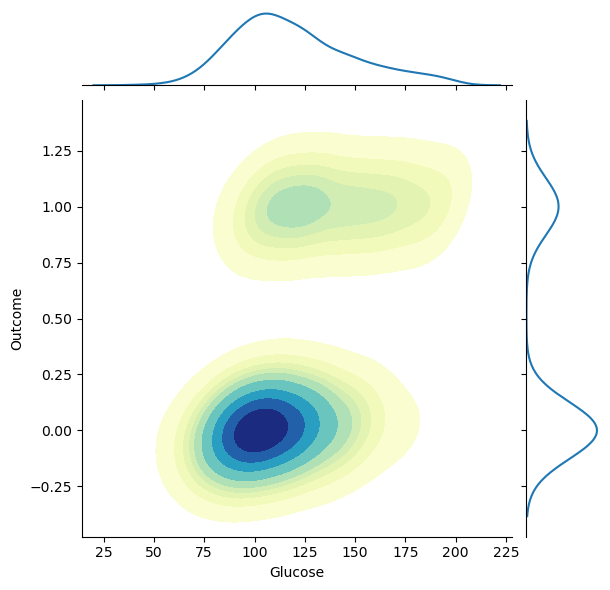

In [62]:
sns.jointplot(data=df_no_outliers, y='''Outcome''', x="Glucose",  kind="kde", shade=True,cmap="YlGnBu")

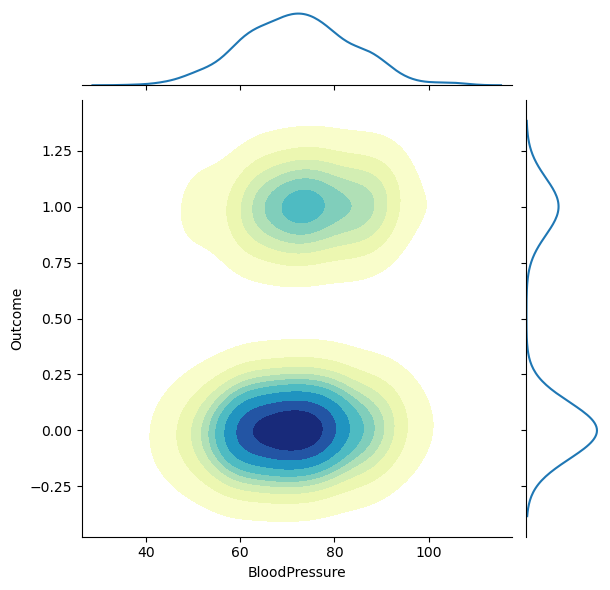

In [63]:
sns.jointplot(data=df_no_outliers, y='''Outcome''', x="BloodPressure",  kind="kde", shade=True,cmap="YlGnBu")

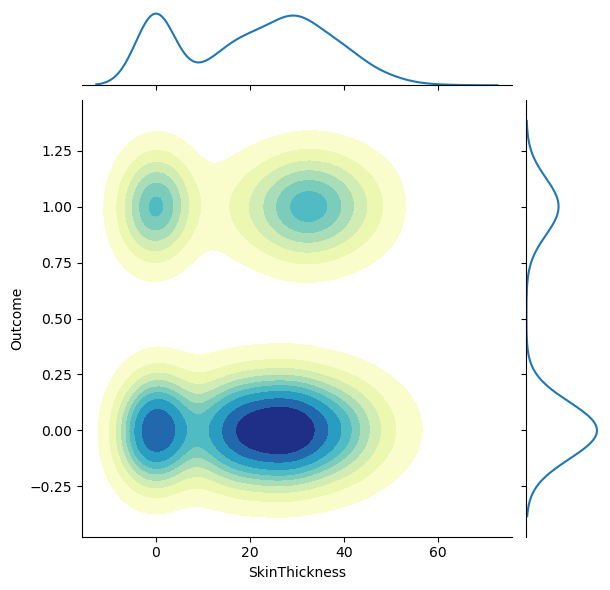

In [64]:
sns.jointplot(data=df_no_outliers, y='''Outcome''', x="SkinThickness",  kind="kde", shade=True,cmap="YlGnBu")

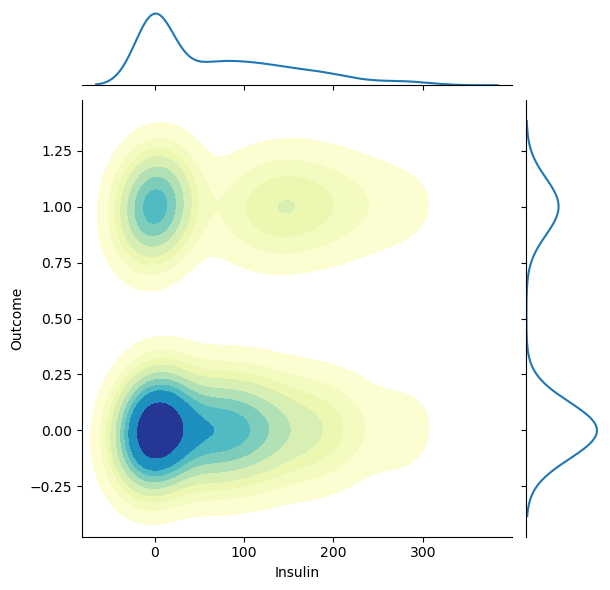

In [65]:
sns.jointplot(data=df_no_outliers, y='''Outcome''', x="Insulin",  kind="kde", shade=True,cmap="YlGnBu")

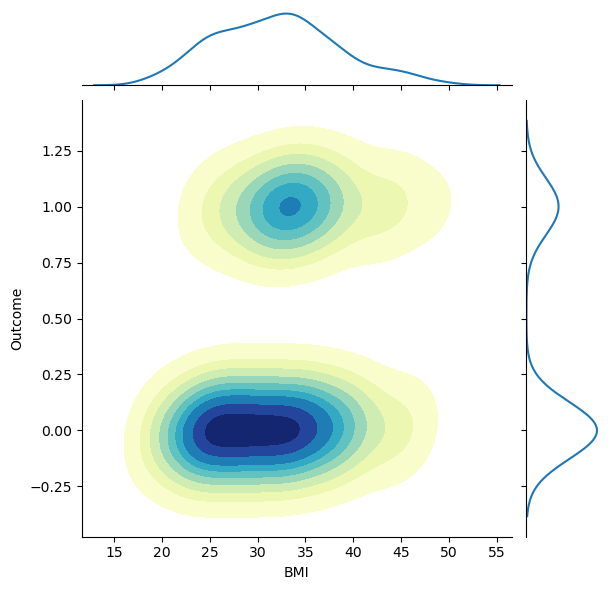

In [66]:
sns.jointplot(data=df_no_outliers, y='''Outcome''', x="BMI",  kind="kde", shade=True,cmap="YlGnBu")

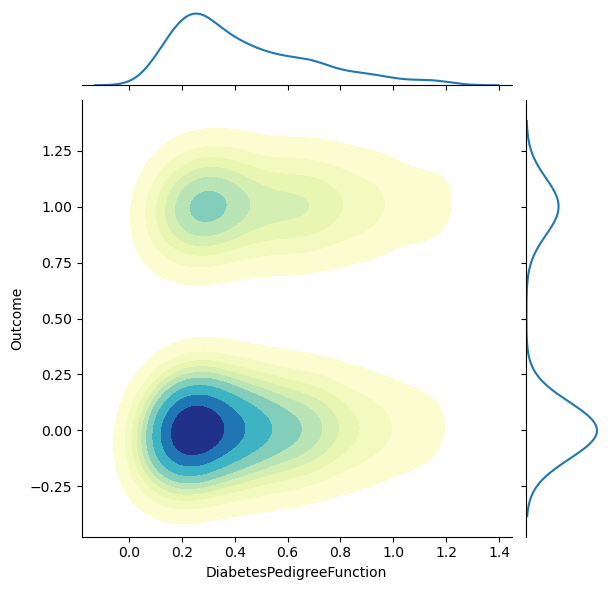

In [67]:
sns.jointplot(data=df_no_outliers, y='''Outcome''', x="DiabetesPedigreeFunction",  kind="kde", shade=True,cmap="YlGnBu")

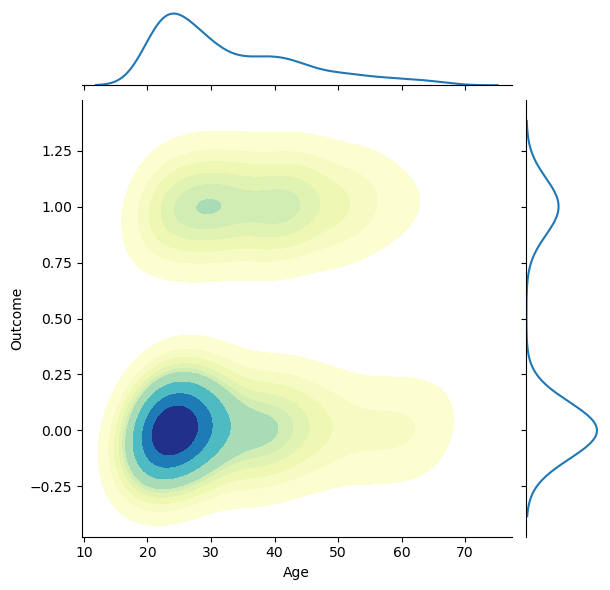

In [68]:
sns.jointplot(data=df_no_outliers, y='''Outcome''', x="Age",  kind="kde", shade=True,cmap="YlGnBu")

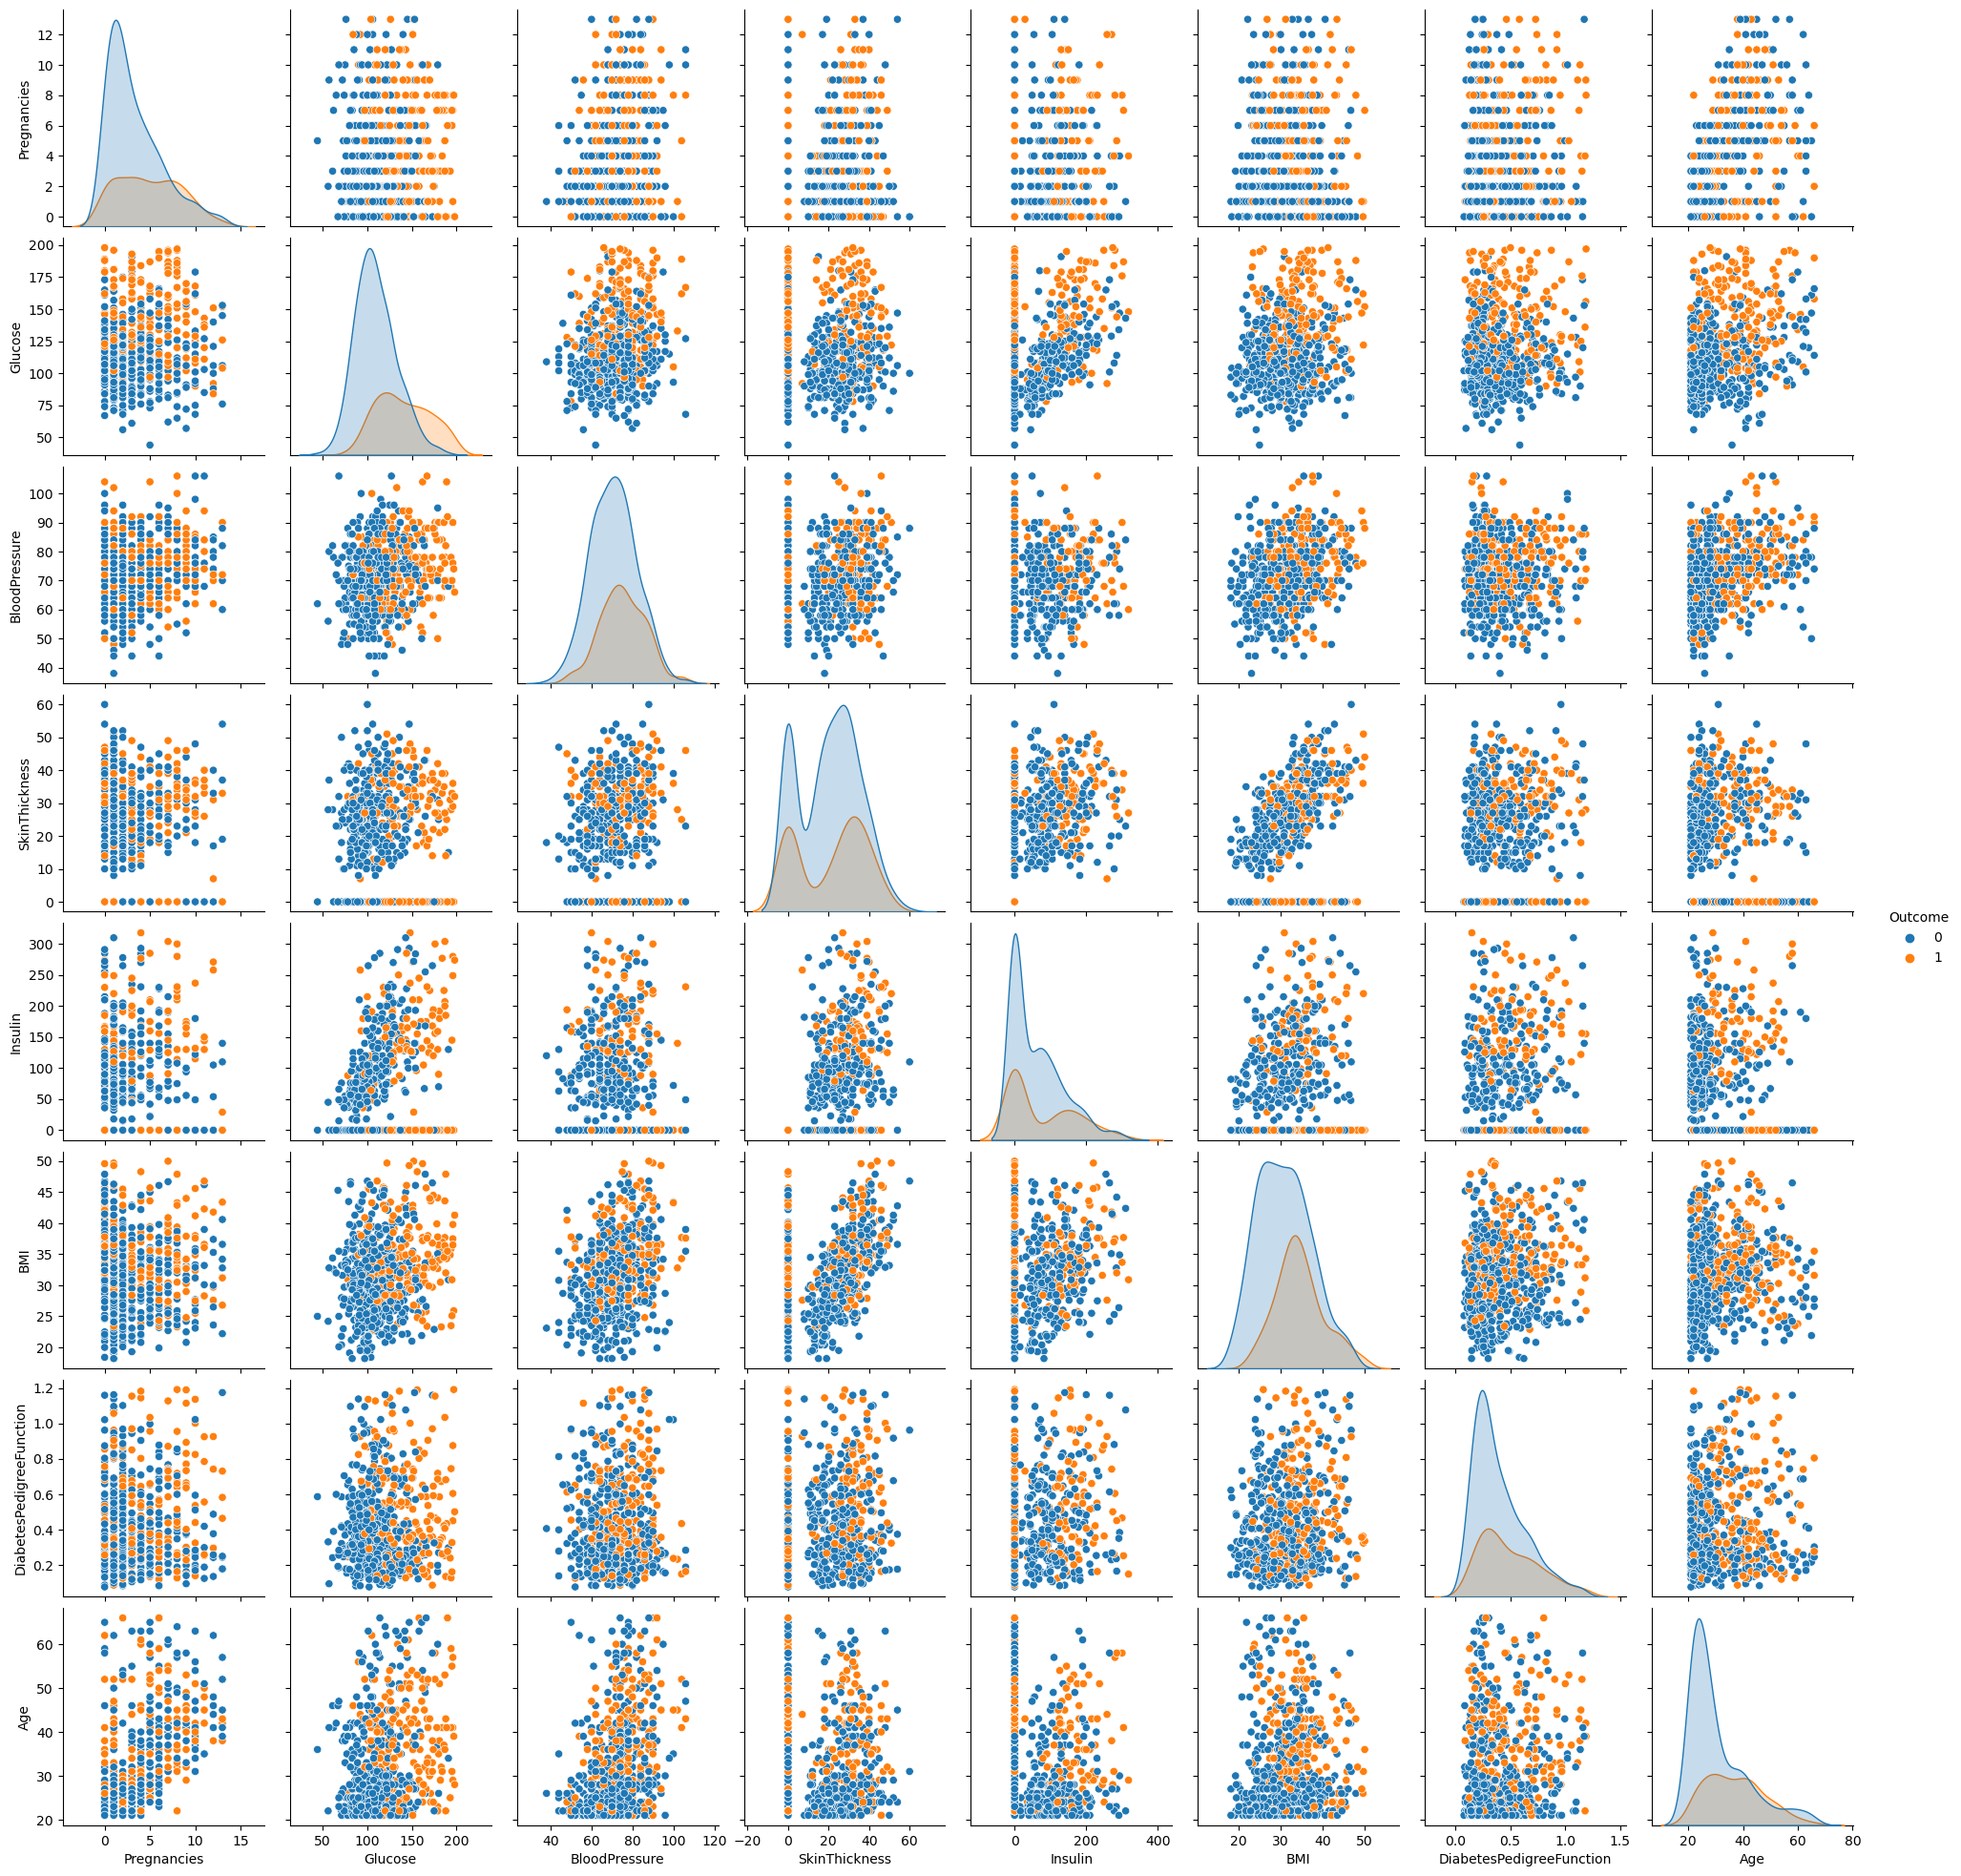

In [69]:
sns.pairplot(df_no_outliers, hue="Outcome")

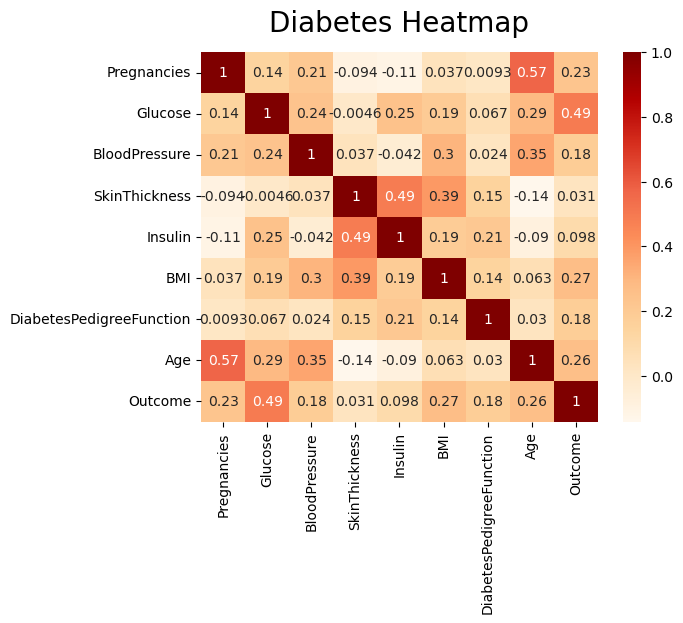

In [70]:
cor = df_no_outliers.corr()
heatmap = sns.heatmap(cor, annot=True , cmap='OrRd')

heatmap.set_title('Diabetes Heatmap', fontdict={'fontsize':20}, pad=15);

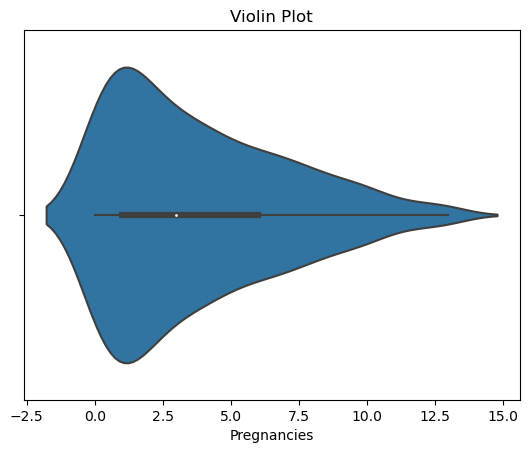

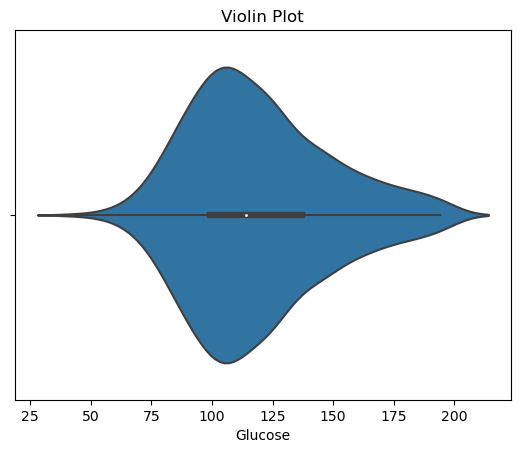

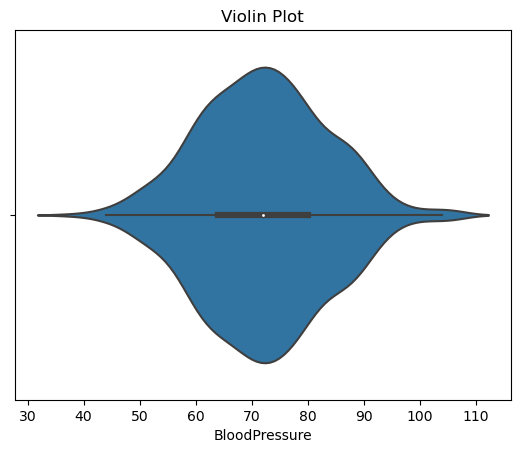

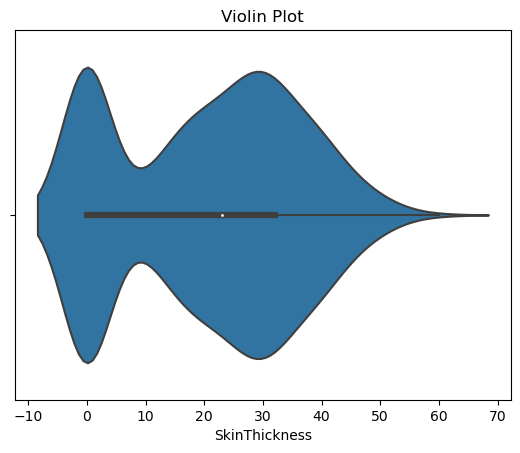

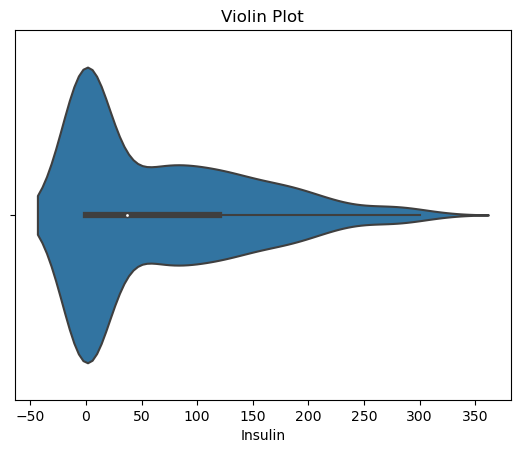

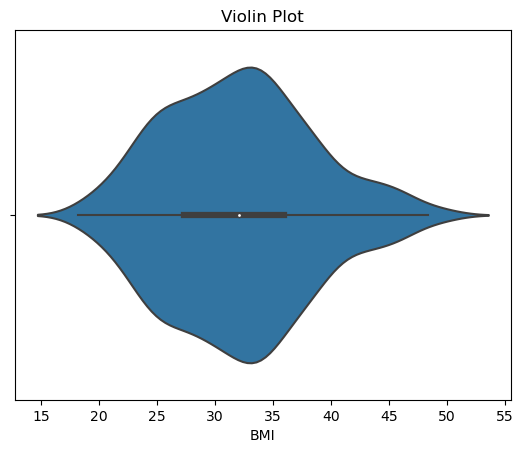

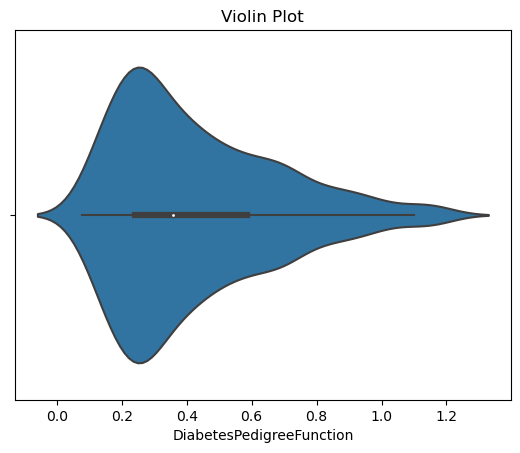

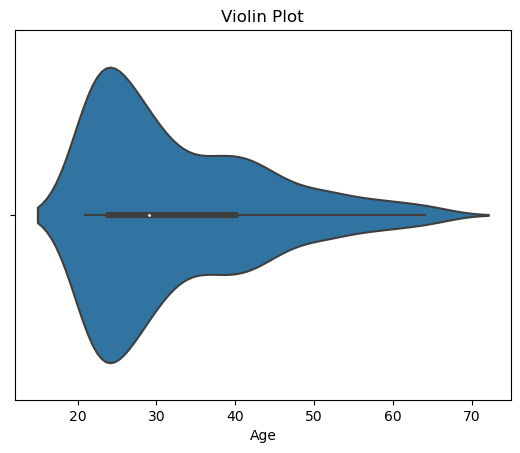

In [71]:
# Violin plot
sns.violinplot(x='Pregnancies', data=df_no_outliers)
plt.title('Violin Plot')
plt.show()

# Violin plot
sns.violinplot(x='Glucose', data=df_no_outliers)
plt.title('Violin Plot')
plt.show()

# Violin plot
sns.violinplot(x='BloodPressure', data=df_no_outliers)
plt.title('Violin Plot')
plt.show()

# Violin plot
sns.violinplot(x='SkinThickness', data=df_no_outliers)
plt.title('Violin Plot')
plt.show()

# Violin plot
sns.violinplot(x='Insulin', data=df_no_outliers)
plt.title('Violin Plot')
plt.show()

# Violin plot
sns.violinplot(x='BMI', data=df_no_outliers)
plt.title('Violin Plot')
plt.show()

# Violin plot
sns.violinplot(x='DiabetesPedigreeFunction', data=df_no_outliers)
plt.title('Violin Plot')
plt.show()

# Violin plot
sns.violinplot(x='Age', data=df_no_outliers)
plt.title('Violin Plot')
plt.show()

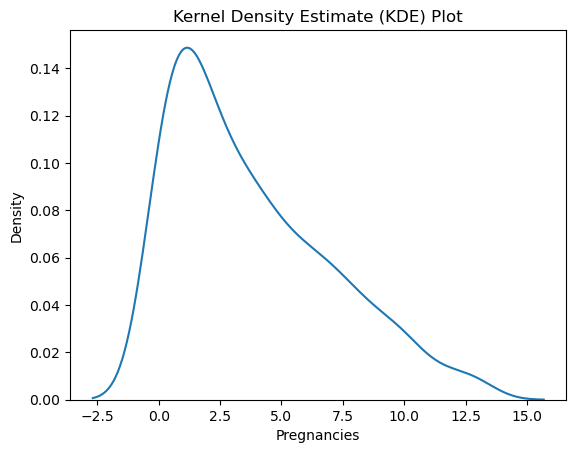

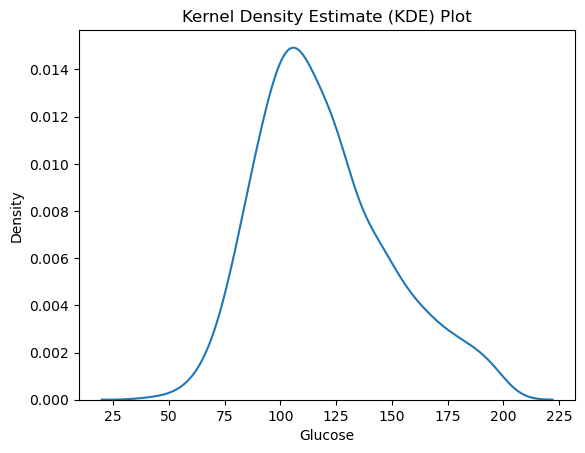

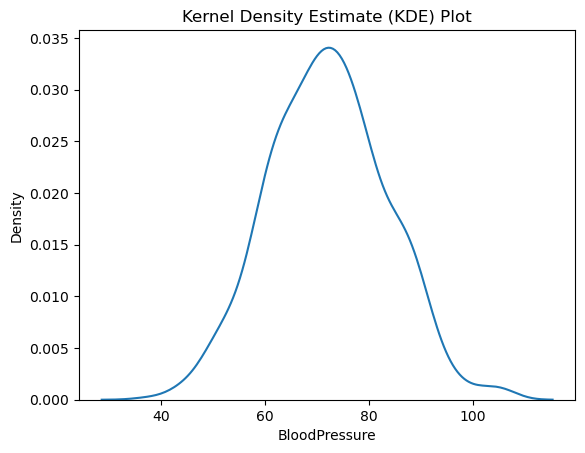

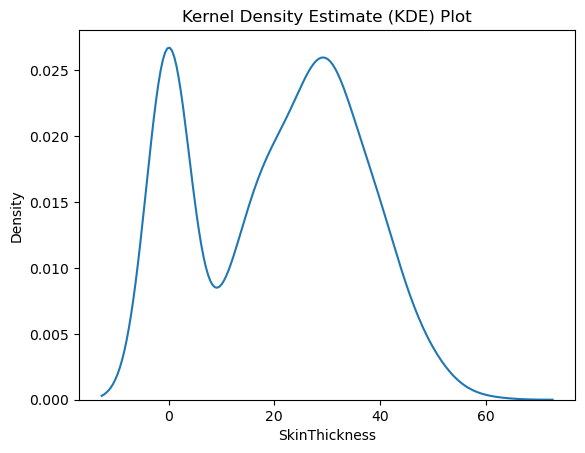

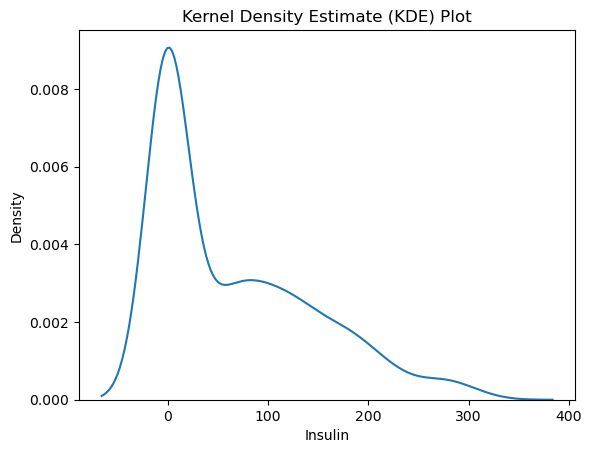

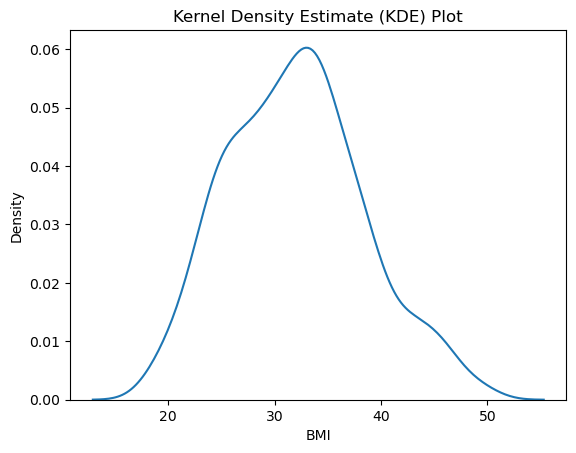

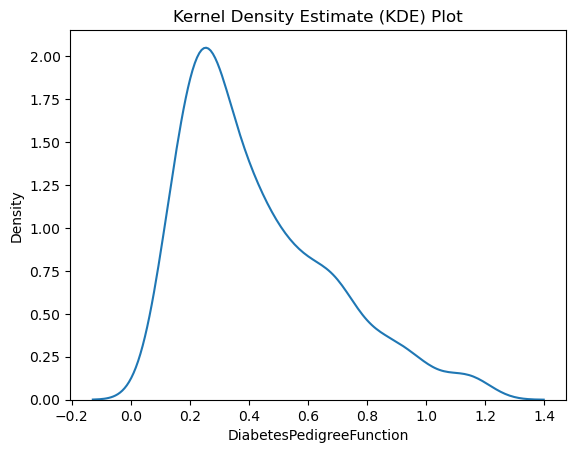

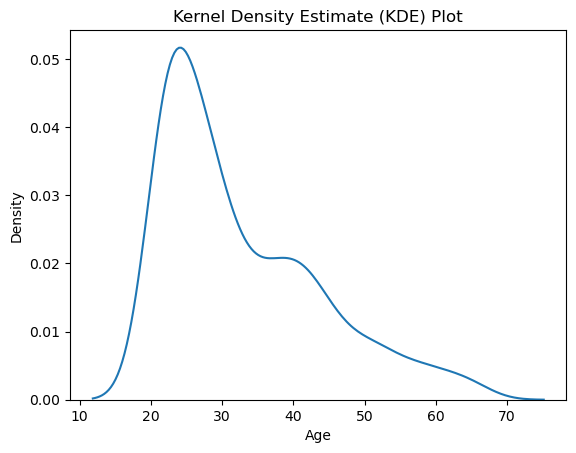

In [72]:
sns.kdeplot(df_no_outliers['Pregnancies'])
plt.title('Kernel Density Estimate (KDE) Plot')
plt.show()

sns.kdeplot(df_no_outliers['Glucose'])
plt.title('Kernel Density Estimate (KDE) Plot')
plt.show()

sns.kdeplot(df_no_outliers['BloodPressure'])
plt.title('Kernel Density Estimate (KDE) Plot')
plt.show()

sns.kdeplot(df_no_outliers['SkinThickness'])
plt.title('Kernel Density Estimate (KDE) Plot')
plt.show()

sns.kdeplot(df_no_outliers['Insulin'])
plt.title('Kernel Density Estimate (KDE) Plot')
plt.show()

sns.kdeplot(df_no_outliers['BMI'])
plt.title('Kernel Density Estimate (KDE) Plot')
plt.show()

sns.kdeplot(df_no_outliers['DiabetesPedigreeFunction'])
plt.title('Kernel Density Estimate (KDE) Plot')
plt.show()

sns.kdeplot(df_no_outliers['Age'])
plt.title('Kernel Density Estimate (KDE) Plot')
plt.show()

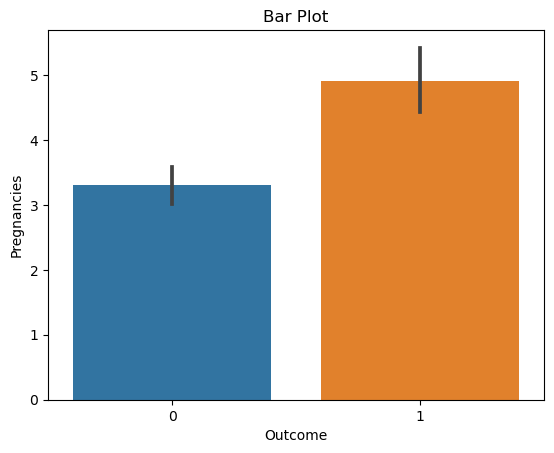

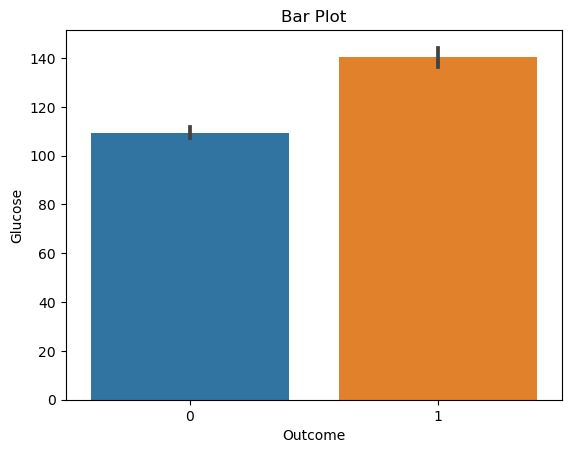

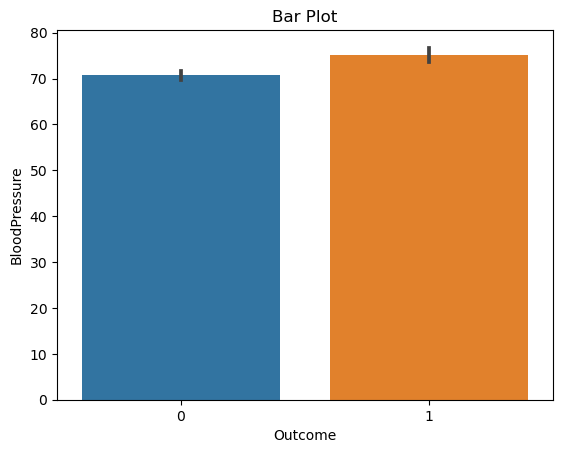

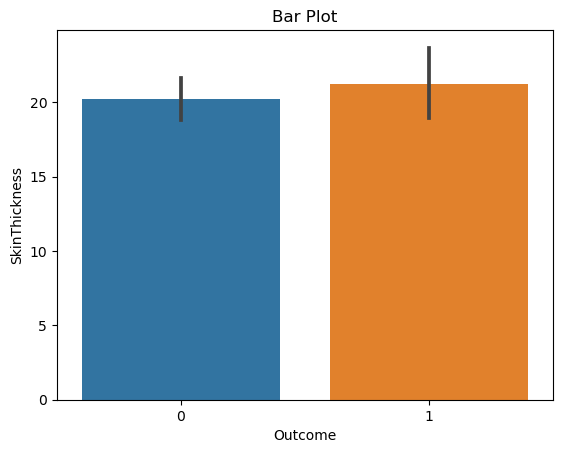

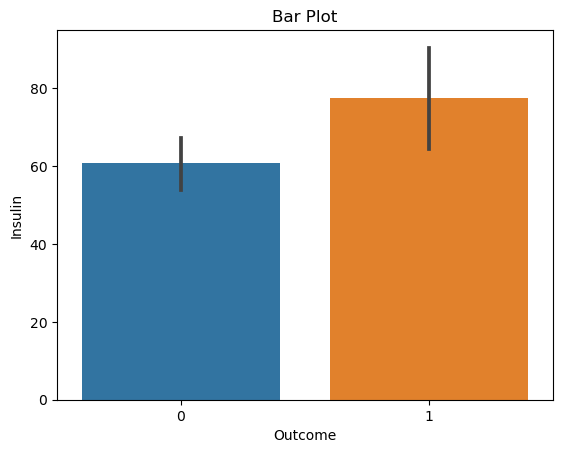

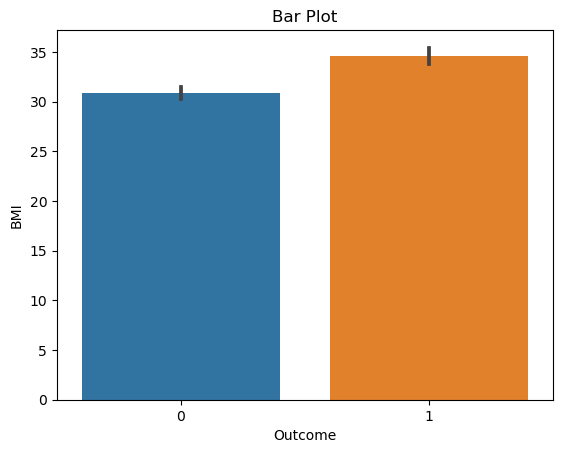

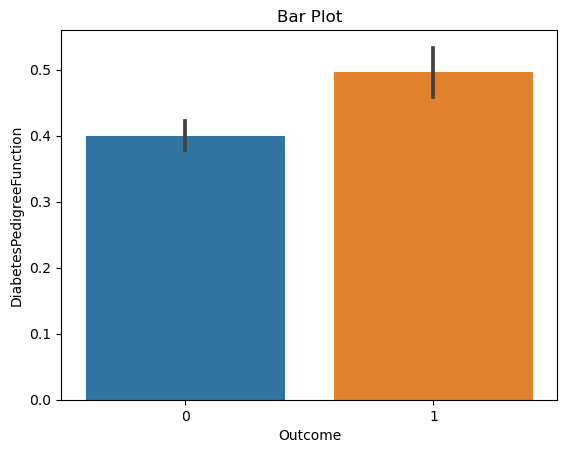

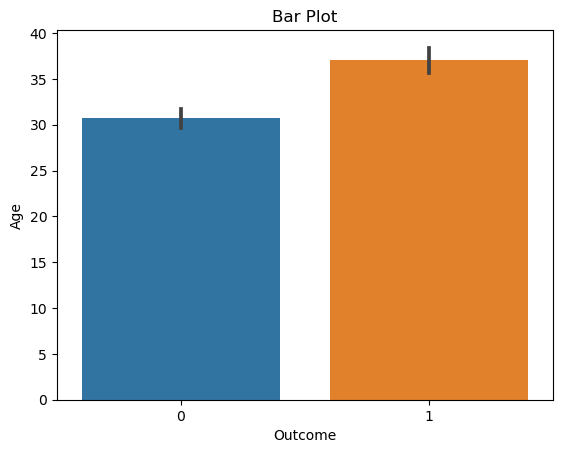

In [73]:
# Categorical Plots
sns.barplot(x='Outcome', y='Pregnancies', data=df_no_outliers)
plt.title('Bar Plot')
plt.show()

# Categorical Plots
sns.barplot(x='Outcome', y='Glucose', data=df_no_outliers)
plt.title('Bar Plot')
plt.show()

# Categorical Plots
sns.barplot(x='Outcome', y='BloodPressure', data=df_no_outliers)
plt.title('Bar Plot')
plt.show()

# Categorical Plots
sns.barplot(x='Outcome', y='SkinThickness', data=df_no_outliers)
plt.title('Bar Plot')
plt.show()

# Categorical Plots
sns.barplot(x='Outcome', y='Insulin', data=df_no_outliers)
plt.title('Bar Plot')
plt.show()

# Categorical Plots
sns.barplot(x='Outcome', y='BMI', data=df_no_outliers)
plt.title('Bar Plot')
plt.show()

# Categorical Plots
sns.barplot(x='Outcome', y='DiabetesPedigreeFunction', data=df_no_outliers)
plt.title('Bar Plot')
plt.show()

# Categorical Plots
sns.barplot(x='Outcome', y='Age', data=df_no_outliers)
plt.title('Bar Plot')
plt.show()

0    500
1    268
Name: Outcome, dtype: int64


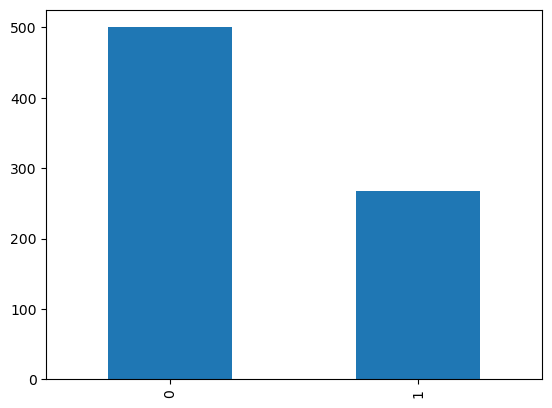

In [74]:
# Creating a plot to check our outcome. 1 means that the patient has diabetes and 0 means the patient does not.

colour_wheel = {1: "#0392cf", 2: "#7bc043"}
colours = df["Outcome"].map(lambda x: colour_wheel.get (x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

0    439
1    200
Name: Outcome, dtype: int64


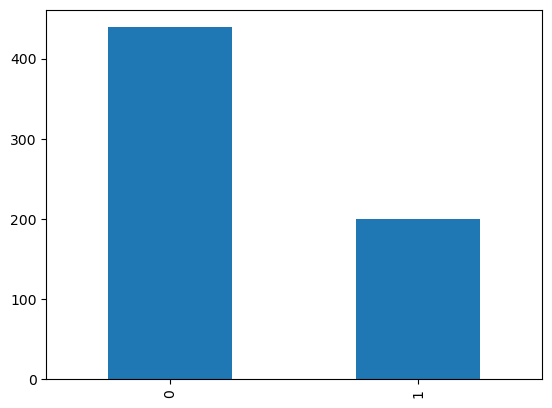

In [75]:
# Creating a plot to check our outcome. 1 means that the patient has diabetes and 0 means the patient does not.

colour_wheel = {1: "#0392cf", 2: "#7bc043"}
colours = df_no_outliers["Outcome"].map(lambda x: colour_wheel.get (x + 1))
print(df_no_outliers.Outcome.value_counts())
p=df_no_outliers.Outcome.value_counts().plot(kind="bar")

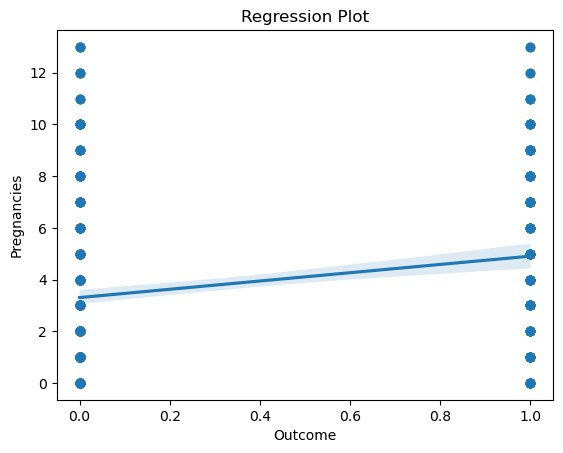

In [76]:
sns.regplot(x='Outcome', y='Pregnancies', data=df_no_outliers)
plt.title('Regression Plot')
plt.show()

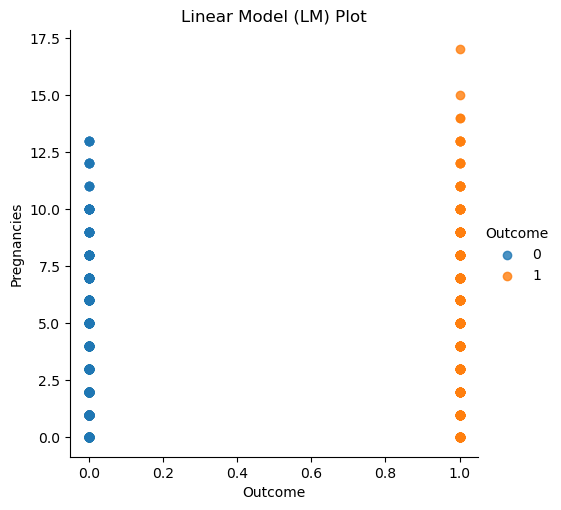

In [77]:
sns.lmplot(x='Outcome', y='Pregnancies', data=df, hue='Outcome')
plt.title('Linear Model (LM) Plot')
plt.show()

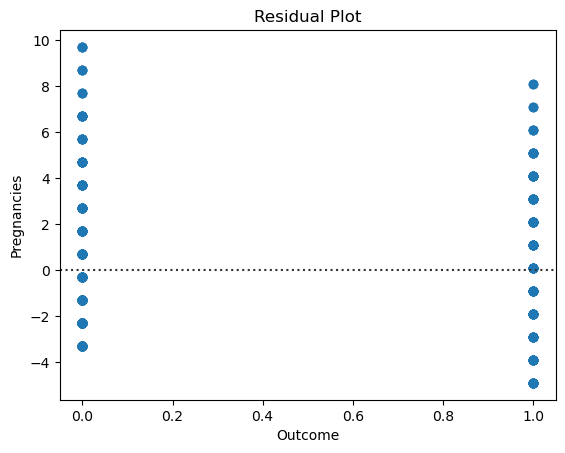

In [78]:
sns.residplot(x='Outcome', y='Pregnancies', data=df_no_outliers)
plt.title('Residual Plot')
plt.show()

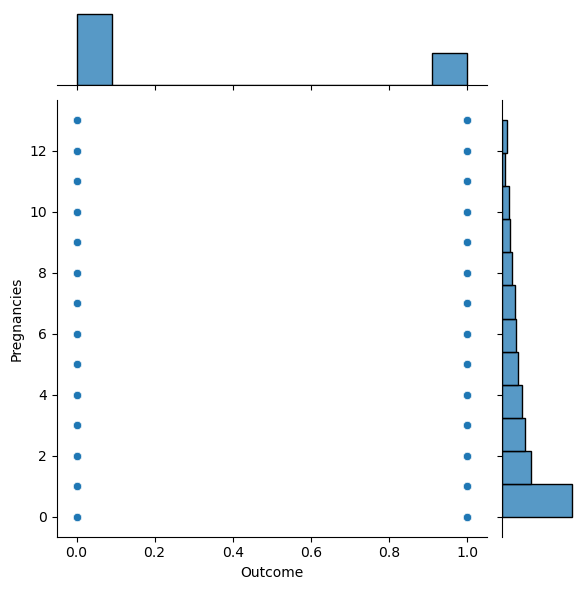

In [79]:
g = sns.JointGrid(data=df_no_outliers, x='Outcome', y='Pregnancies')
g.plot(sns.scatterplot, sns.histplot)
plt.show()

In [80]:
sns.color_palette("pastel")
sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95)
sns.dark_palette("purple", as_cmap=True)

plt.show()

In [81]:
# 3D Scatter plot
fig = px.scatter_3d(df, x='Pregnancies', y='Glucose', z='Insulin', color='Outcome')
fig.show()

In [82]:
# 3D Scatter plot
fig = px.scatter_3d(df, x='Pregnancies', y='Glucose', z='BMI', color='Outcome')
fig.show()

In [351]:
# 3D Scatter plot
fig = px.scatter_3d(df, x='Glucose', y='SkinThickness', z='Age', color='Outcome')
fig.show()

In [352]:
# 3D Scatter plot
fig = px.scatter_3d(df, x='BMI', y='Age', z='Insulin', color='Outcome')
fig.show()

In [353]:
# 3D Scatter plot
fig = px.scatter_3d(df, x='SkinThickness', y='BMI', z='Glucose', color='Outcome')
fig.show()

In [354]:
# 3D Scatter plot
fig = px.scatter_3d(df, x='Insulin', y='Glucose', z='BMI', color='Outcome')
fig.show()

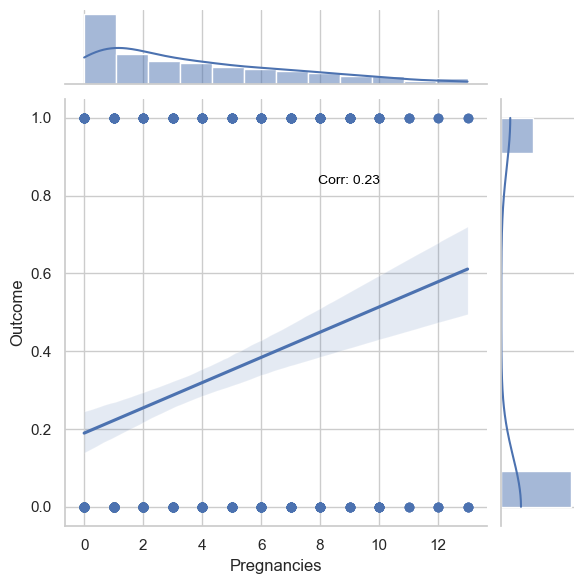

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(42)
data = df
data = np.random.randn(100, 2)
df_no_outliers = pd.DataFrame(data, columns=['Pregnancies', 'Outcome'])

# Create a joint plot with regression line and correlation coefficient
sns.set(style="whitegrid")
joint_plot = sns.jointplot(x='Pregnancies', y='Outcome', data=df, kind='reg')

# Extract the correlation coefficient from the joint plot
corr_coefficient = df['Pregnancies'].corr(df['Outcome'])

# Annotate the joint plot with the correlation coefficient
joint_plot.ax_joint.annotate(f"Corr: {corr_coefficient:.2f}", xy=(0.6, 0.8), xycoords="axes fraction", fontsize=10, color="black")

plt.show()

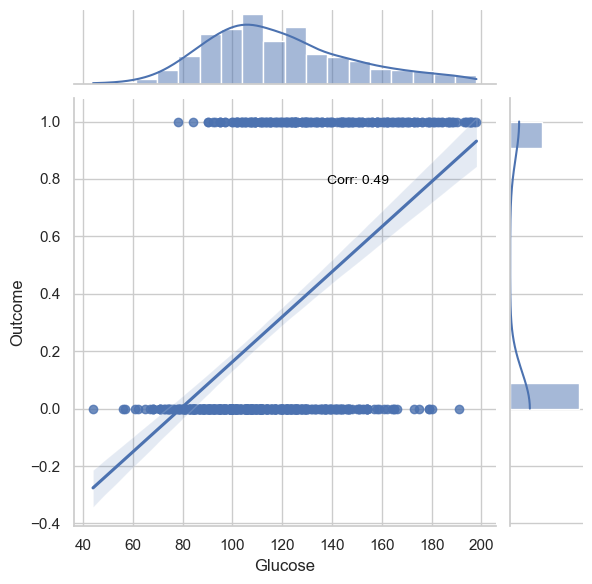

In [357]:
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(42)
data = df
data = np.random.randn(100, 2)
df_no_outliers = pd.DataFrame(data, columns=['Glucose', 'Outcome'])

# Create a joint plot with regression line and correlation coefficient
sns.set(style="whitegrid")
joint_plot = sns.jointplot(x='Glucose', y='Outcome', data=df, kind='reg')

# Extract the correlation coefficient from the joint plot
corr_coefficient = df['Glucose'].corr(df['Outcome'])

# Annotate the joint plot with the correlation coefficient
joint_plot.ax_joint.annotate(f"Corr: {corr_coefficient:.2f}", xy=(0.6, 0.8), xycoords="axes fraction", fontsize=10, color="black")

plt.show()

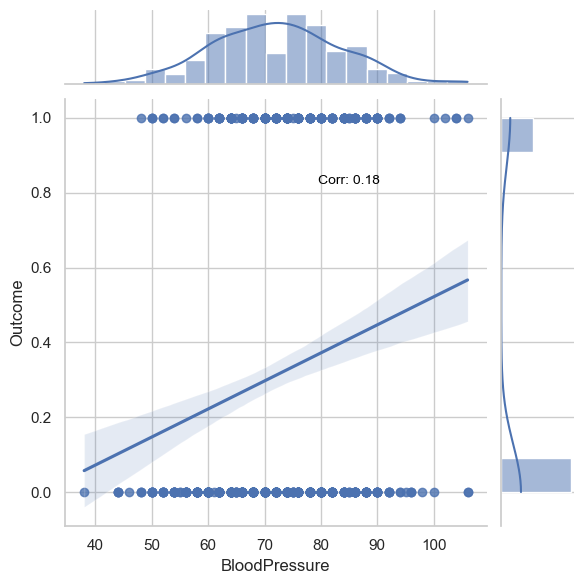

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(42)
data = df
data = np.random.randn(100, 2)
df_no_outliers = pd.DataFrame(data, columns=['BloodPressure', 'Outcome'])

# Create a joint plot with regression line and correlation coefficient
sns.set(style="whitegrid")
joint_plot = sns.jointplot(x='BloodPressure', y='Outcome', data=df, kind='reg')

# Extract the correlation coefficient from the joint plot
corr_coefficient = df['BloodPressure'].corr(df['Outcome'])

# Annotate the joint plot with the correlation coefficient
joint_plot.ax_joint.annotate(f"Corr: {corr_coefficient:.2f}", xy=(0.6, 0.8), xycoords="axes fraction", fontsize=10, color="black")

plt.show()

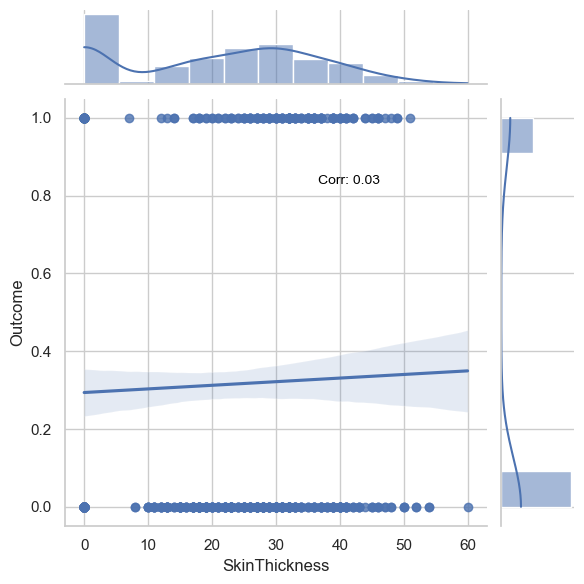

In [359]:
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(42)
data = df
data = np.random.randn(100, 2)
df_no_outliers = pd.DataFrame(data, columns=['SkinThickness', 'Outcome'])

# Create a joint plot with regression line and correlation coefficient
sns.set(style="whitegrid")
joint_plot = sns.jointplot(x='SkinThickness', y='Outcome', data=df, kind='reg')

# Extract the correlation coefficient from the joint plot
corr_coefficient = df['SkinThickness'].corr(df['Outcome'])

# Annotate the joint plot with the correlation coefficient
joint_plot.ax_joint.annotate(f"Corr: {corr_coefficient:.2f}", xy=(0.6, 0.8), xycoords="axes fraction", fontsize=10, color="black")

plt.show()

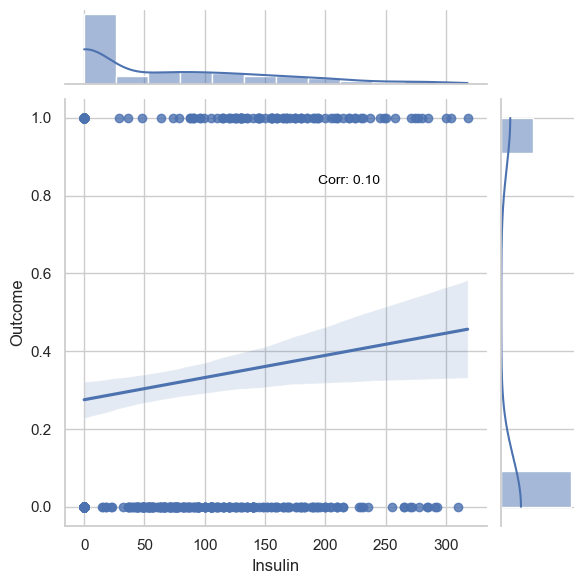

In [360]:
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(42)
data = df
data = np.random.randn(100, 2)
df_no_outliers = pd.DataFrame(data, columns=['Insulin', 'Outcome'])

# Create a joint plot with regression line and correlation coefficient
sns.set(style="whitegrid")
joint_plot = sns.jointplot(x='Insulin', y='Outcome', data=df, kind='reg')

# Extract the correlation coefficient from the joint plot
corr_coefficient = df['Insulin'].corr(df['Outcome'])

# Annotate the joint plot with the correlation coefficient
joint_plot.ax_joint.annotate(f"Corr: {corr_coefficient:.2f}", xy=(0.6, 0.8), xycoords="axes fraction", fontsize=10, color="black")

plt.show()

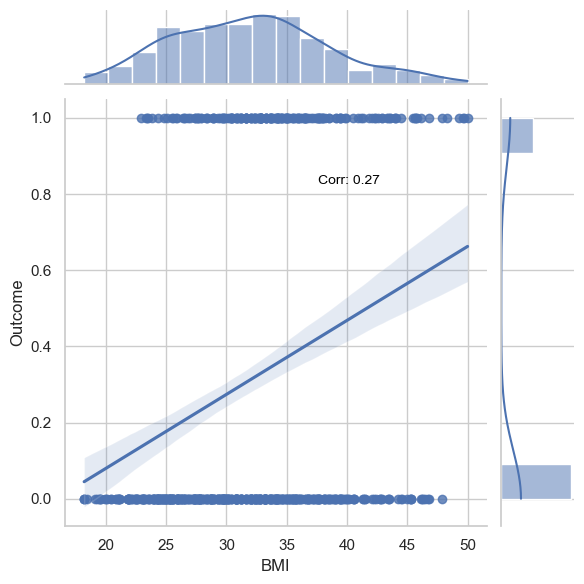

In [361]:
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(42)
data = df
data = np.random.randn(100, 2)
df_no_outliers = pd.DataFrame(data, columns=['BMI', 'Outcome'])

# Create a joint plot with regression line and correlation coefficient
sns.set(style="whitegrid")
joint_plot = sns.jointplot(x='BMI', y='Outcome', data=df, kind='reg')

# Extract the correlation coefficient from the joint plot
corr_coefficient = df['BMI'].corr(df['Outcome'])

# Annotate the joint plot with the correlation coefficient
joint_plot.ax_joint.annotate(f"Corr: {corr_coefficient:.2f}", xy=(0.6, 0.8), xycoords="axes fraction", fontsize=10, color="black")

plt.show()

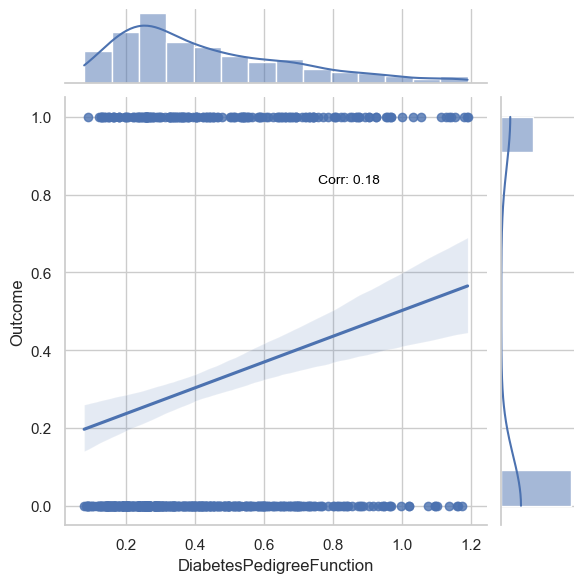

In [362]:
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(42)
data = df
data = np.random.randn(100, 2)
df_no_outliers = pd.DataFrame(data, columns=['DiabetesPedigreeFunction', 'Outcome'])

# Create a joint plot with regression line and correlation coefficient
sns.set(style="whitegrid")
joint_plot = sns.jointplot(x='DiabetesPedigreeFunction', y='Outcome', data=df, kind='reg')

# Extract the correlation coefficient from the joint plot
corr_coefficient = df['DiabetesPedigreeFunction'].corr(df['Outcome'])

# Annotate the joint plot with the correlation coefficient
joint_plot.ax_joint.annotate(f"Corr: {corr_coefficient:.2f}", xy=(0.6, 0.8), xycoords="axes fraction", fontsize=10, color="black")

plt.show()

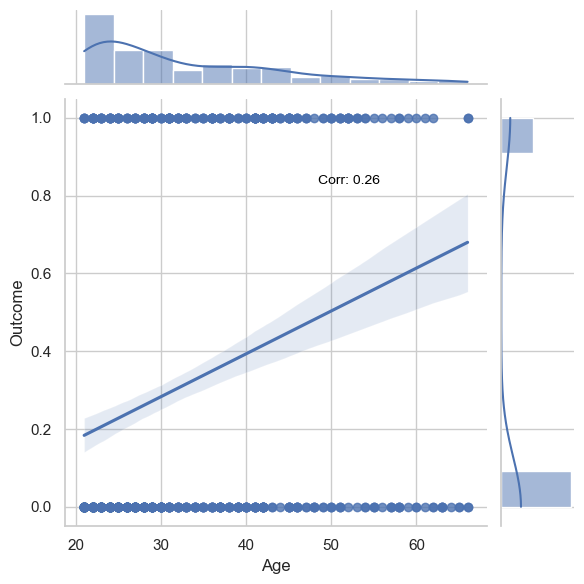

In [363]:
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(42)
data = df
data = np.random.randn(100, 2)
df_no_outliers = pd.DataFrame(data, columns=['Age', 'Outcome'])

# Create a joint plot with regression line and correlation coefficient
sns.set(style="whitegrid")
joint_plot = sns.jointplot(x='Age', y='Outcome', data=df, kind='reg')

# Extract the correlation coefficient from the joint plot
corr_coefficient = df['Age'].corr(df['Outcome'])

# Annotate the joint plot with the correlation coefficient
joint_plot.ax_joint.annotate(f"Corr: {corr_coefficient:.2f}", xy=(0.6, 0.8), xycoords="axes fraction", fontsize=10, color="black")

plt.show()

Accuracy: 0.7755905511811023
Confusion Matrix:
[[146  25]
 [ 32  51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       171
           1       0.67      0.61      0.64        83

    accuracy                           0.78       254
   macro avg       0.75      0.73      0.74       254
weighted avg       0.77      0.78      0.77       254

Logistic Regression Accuracy 0.7755905511811023


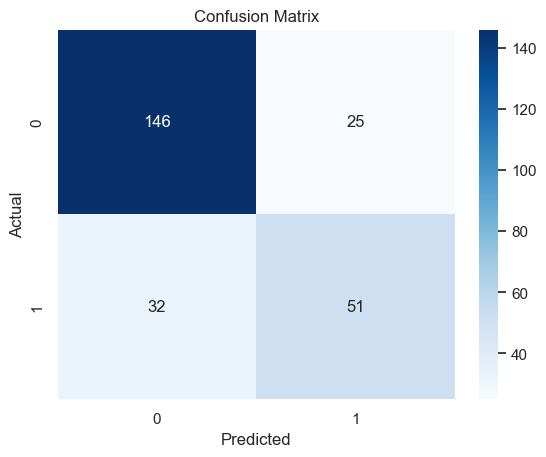

In [425]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Pima Indian Diabetes dataset
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df_no_outliers = pd.read_csv(url, names=columns)

# Separate features (X) and target variable (y)
X = df_no_outliers.drop('Outcome', axis=1)
y = df_no_outliers['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=52)

lr=LogisticRegression(C=50)

lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

# Initialize and fit the logistic regression model
model = LogisticRegression(random_state=52)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print("Logistic Regression Accuracy", accuracy_score(y_test,y_pred))

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.7662337662337663
Confusion Matrix:
[[79 20]
 [16 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



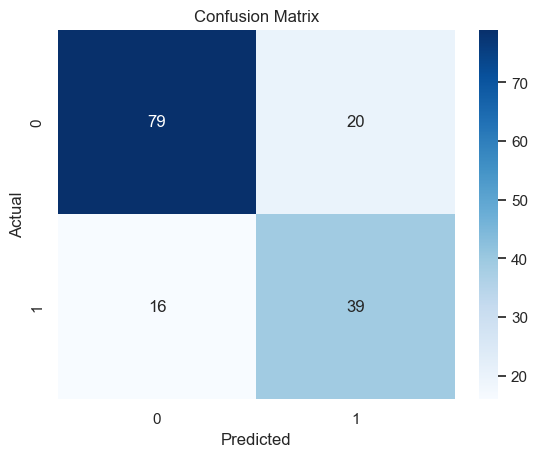

In [388]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.7922077922077922
Confusion Matrix:
[[44  7]
 [ 9 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        51
           1       0.71      0.65      0.68        26

    accuracy                           0.79        77
   macro avg       0.77      0.76      0.76        77
weighted avg       0.79      0.79      0.79        77



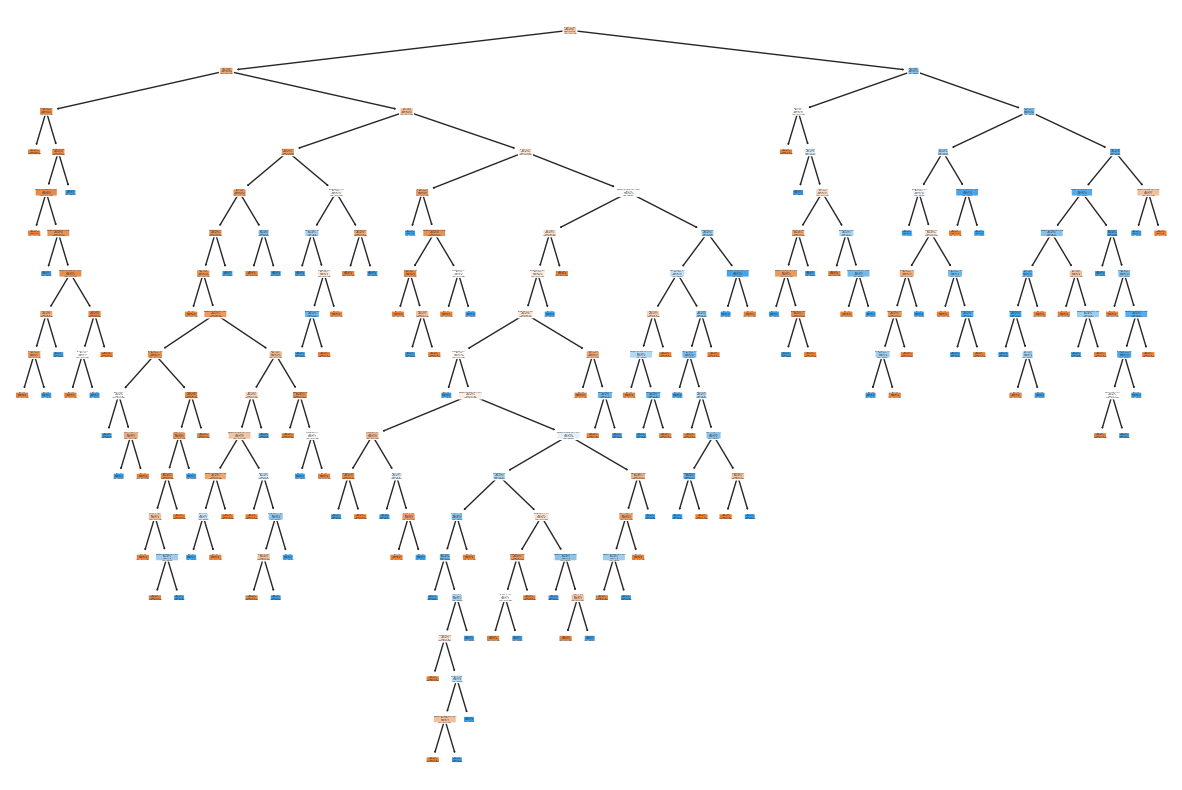

In [431]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the Pima Indian Diabetes dataset
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df_no_outliers = pd.read_csv(url, names=columns)

# Separate features (X) and target variable (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=72)

# Initialize and fit the Decision Tree model
model = DecisionTreeClassifier(random_state=72)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plotting the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)
plt.show()


Accuracy: 0.7792207792207793
Confusion Matrix:
[[45  6]
 [11 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        51
           1       0.71      0.58      0.64        26

    accuracy                           0.78        77
   macro avg       0.76      0.73      0.74        77
weighted avg       0.77      0.78      0.77        77



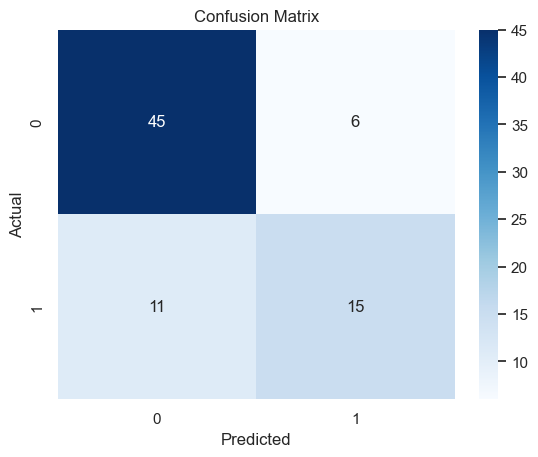

In [432]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the Pima Indian Diabetes dataset
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df_no_outliers = pd.read_csv(url, names=columns)

# Separate features (X) and target variable (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=72)

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the SVM model
model = SVC(kernel='linear', random_state=72)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.7598425196850394
Confusion Matrix:
[[142  29]
 [ 32  51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       171
           1       0.64      0.61      0.63        83

    accuracy                           0.76       254
   macro avg       0.73      0.72      0.72       254
weighted avg       0.76      0.76      0.76       254



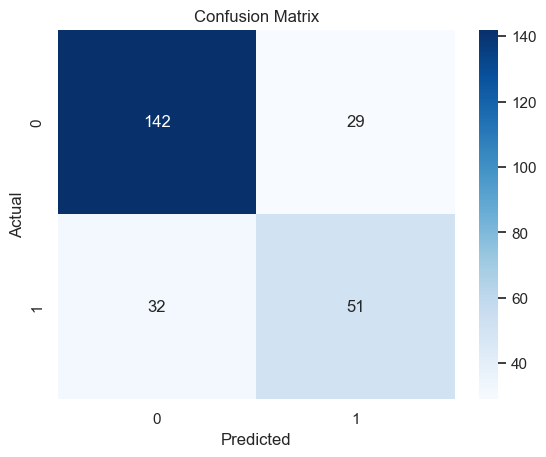

In [433]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the Pima Indian Diabetes dataset
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df_no_outliers = pd.read_csv(url, names=columns)

# Separate features (X) and target variable (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=72)

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the KNN model
k = 3  # You can experiment with different values of k
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.7532467532467533
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



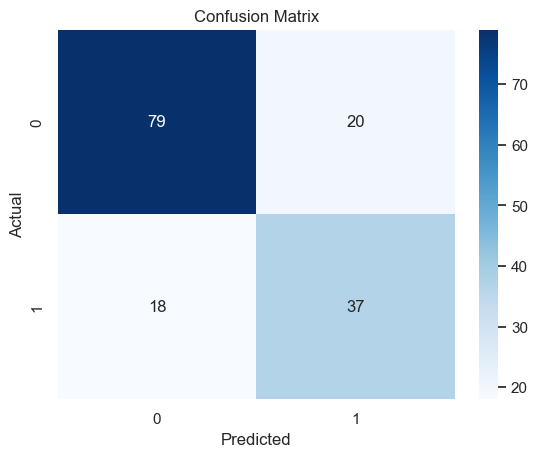

In [371]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the Pima Indian Diabetes dataset
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df_no_ouliers = pd.read_csv(url, names=columns)

# Separate features (X) and target variable (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.8311688311688312
Confusion Matrix:
[[47  4]
 [ 9 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        51
           1       0.81      0.65      0.72        26

    accuracy                           0.83        77
   macro avg       0.82      0.79      0.80        77
weighted avg       0.83      0.83      0.83        77



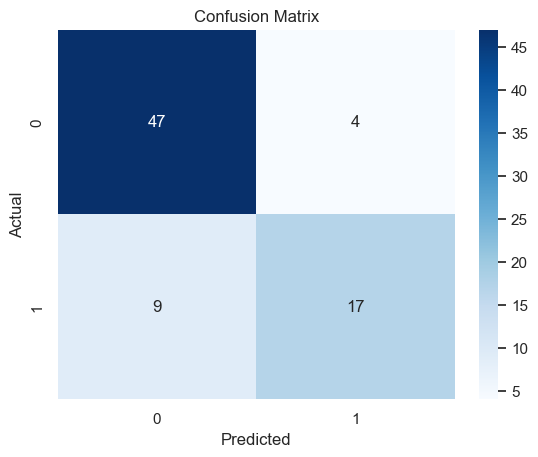

In [439]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Pima Indian Diabetes dataset
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df_no_outliers = pd.read_csv(url, names=columns)

# Separate features (X) and target variable (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=72)

# Initialize and fit the Random Forest model
model = RandomForestClassifier(random_state=72)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.7532467532467533
Confusion Matrix:
[[42  9]
 [10 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82        51
           1       0.64      0.62      0.63        26

    accuracy                           0.75        77
   macro avg       0.72      0.72      0.72        77
weighted avg       0.75      0.75      0.75        77



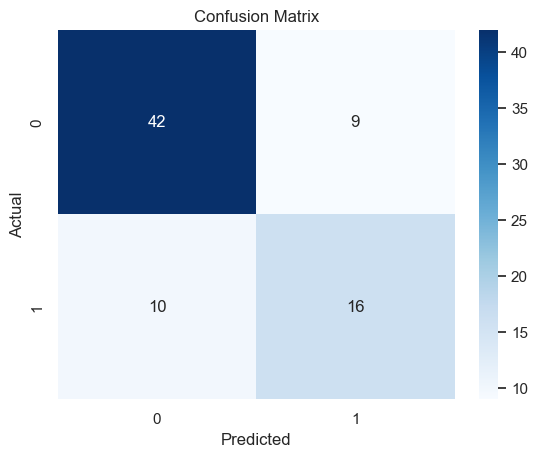

In [442]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the Pima Indian Diabetes dataset
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df_no_outliers = pd.read_csv(url, names=columns)

# Separate features (X) and target variable (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=72)

# Feature scaling (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Neural Network (MLP) model
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=72)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
